<a href="https://colab.research.google.com/github/bhavyakarna123/Java/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install catboost




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [4]:
# import libraries
# 1. to handle the data
import pandas as pd
import numpy as np
# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#QQ Plots
import math
import scipy.stats as stats
# Add this line at the beginning of your notebook to display plots inline
%matplotlib inline
# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler , OneHotEncoder , QuantileTransformer ,PowerTransformer
from sklearn.impute import SimpleImputer
# Import Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.decomposition import TruncatedSVD , PCA
#Model
# import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool , CatBoostRegressor
from catboost.utils import eval_metric
#Evaluation metric
from sklearn.metrics import mean_squared_error , r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#For Plotting
sns.set_style("dark")
sns.set(rc={"axes.facecolor":"#42EADDFF","figure.facecolor":"#42EADDFF","grid.color":"White"})
sns.set_context("talk",font_scale = .7)
# palette = ["#432C0A","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette = ["#42EADDFF","#466964","#6c9a76","#f25a29","#cc4b57"]
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

# Setting Max rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Training Dataset
df_train = pd.read_csv('/content/train.csv')
#Testting Dataset
df_test = pd.read_csv('/content/test.csv')
#Submission
df_submission = pd.read_csv('/content/sample_submission.csv')

In [7]:
df_test_id = df_test['Id']

In [8]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [9]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [10]:
df_submission.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [11]:
# Checking the number of rows and columns
#Train
num_train_rows, num_train_columns = df_train.shape
#Test
num_test_rows, num_test_columns = df_test.shape
# Submission
num_submission_rows, num_submission_columns = df_submission.shape
#Printing the number of rows and columns.
print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

print("Test Data:")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns: {num_test_columns}\n")

print("Submission Data:")
print(f"Number of Rows: {num_submission_rows}")
print(f"Number of Columns: {num_submission_columns}")

Training Data:
Number of Rows: 1460
Number of Columns: 81

Test Data:
Number of Rows: 1459
Number of Columns: 80

Submission Data:
Number of Rows: 1459
Number of Columns: 2


In [12]:
# Null Values in Train
train_null = df_train.isnull().sum().sum()

#Null Count in Test
test_null = df_test.isnull().sum().sum()

#null Count in Submission
submission_null = df_submission.isnull().sum().sum()

print(f'Null Count in Train: {train_null}')
print(f'Null Count in Test: {test_null}')
print(f'Null Count in Submission: {submission_null}')

Null Count in Train: 7829
Null Count in Test: 7878
Null Count in Submission: 0


In [13]:
# Count duplicate rows in train_data
train_duplicates = df_train.duplicated().sum()

# Count duplicate rows in test_data
test_duplicates = df_test.duplicated().sum()

# Count duplicate rows in original_data
submission_duplicates = df_submission.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")
print(f"Number of duplicate rows in test_data: {test_duplicates}")
print(f"Number of duplicate rows in test_data: {submission_duplicates}")

Number of duplicate rows in train_data: 0
Number of duplicate rows in test_data: 0
Number of duplicate rows in test_data: 0


In [14]:
# Calculate the percentage of missing values for each column
missing_percentage = ((df_train.isnull().sum() / len(df_train)) * 100).sort_values(ascending=False)

# Filter to include only percentages above zero
missing_percentage_above_zero = missing_percentage[missing_percentage > 0]

# Round the percentages to two decimal places
missing_percentage_above_zero = missing_percentage_above_zero.round(2)

# Display the filtered percentages
print(missing_percentage_above_zero)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64


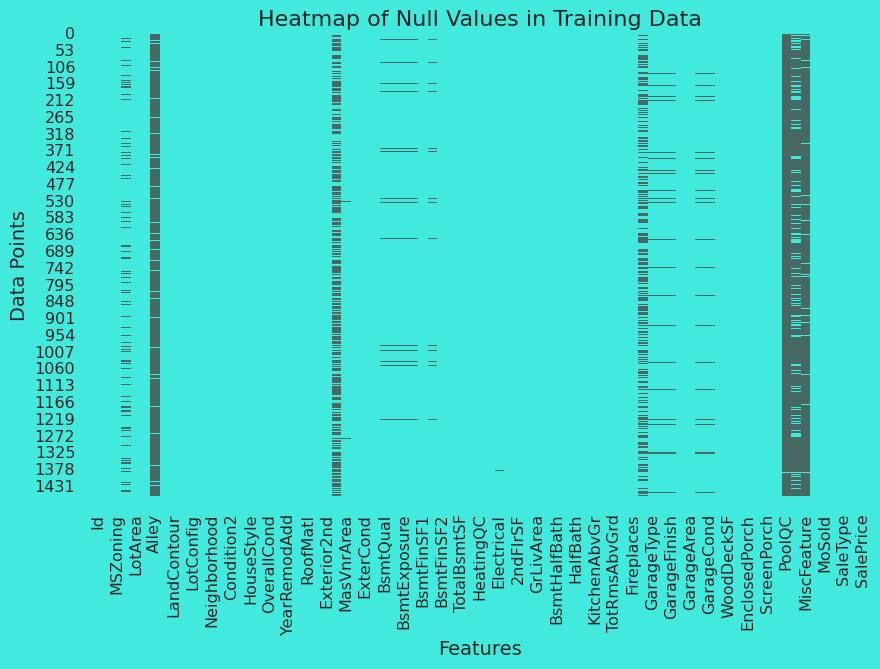

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom color palette
colors = palette[0:2]  # White for non-null, Red for null, Black, Green
col = sns.color_palette(colors)

# Create the heatmap to visualize null values
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap=col)
plt.title('Heatmap of Null Values in Training Data', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Data Points', fontsize=14)
plt.show()

In [16]:
#Train
num_train_rows, num_train_columns = df_train.shape
#Printing the number of rows and columns.
print("Training Data Shape :")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

Training Data Shape :
Number of Rows: 1460
Number of Columns: 81



In [17]:
# Count duplicate rows in train_data
train_duplicates = df_train.duplicated().sum()
print(f"Number of duplicate rows in train_data: {train_duplicates}")

Number of duplicate rows in train_data: 0


In [18]:
# Info ()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
# Printing Columns That Have Dtype is Object or categorical.
object_columns = df_train.select_dtypes(include=['object']).columns
print(f'The Following Columns Have Dtype as Object \n \n : {object_columns}')
object_columns.value_counts().sum()

The Following Columns Have Dtype as Object 
 
 : Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


43

In [20]:
# Printing Columns That Have Dtype is FLoat or int
float_columns = df_train.select_dtypes(include=['float','int']).columns
print(f'The Following Columns Have Dtype as Float and int :\n\n{float_columns}')
float_columns.value_counts().sum()

The Following Columns Have Dtype as Float and int :

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


38

In [21]:
# Describe
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [22]:
# These are the missing values above the threshold
threshold = 20
total_entries = len(df_train)
target = 'SalePrice'
# Calculate the percentage of missing values for each column
missing_percentage = ((df_train.isnull().sum() / len(df_train)) * 100).sort_values(ascending=False)
# Filter to include only percentages above Thresolg
missing_percentage_above_zero = missing_percentage[missing_percentage > threshold]
# Display the filtered percentages
print(missing_percentage_above_zero)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
FireplaceQu    47.260274
dtype: float64


In [23]:
# Replacing Nan Values with None
higly_miss_cols = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu']
for col in higly_miss_cols:
    df_train[col].fillna('None',inplace=True)

In [24]:
# These are the missing values above the threshold
threshold = 20
total_entries = len(df_test)
target = 'SalePrice'
# Calculate the percentage of missing values for each column
missing_percentage_test = ((df_test.isnull().sum() / len(df_test)) * 100).sort_values(ascending=False)
# Filter to include only percentages above Threshold
missing_percentage_above_zero_test = missing_percentage_test[missing_percentage_test > threshold]
# Display the filtered percentages
print(missing_percentage_above_zero_test)

PoolQC         99.794380
MiscFeature    96.504455
Alley          92.666210
Fence          80.123372
MasVnrType     61.274846
FireplaceQu    50.034270
dtype: float64


In [25]:
# Replace 'NaN' with 'None' in these columns
higly_miss_cols = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu']
for col in higly_miss_cols:
    df_test[col].fillna('None',inplace=True)

In [26]:
# List of numerical columns with missing values between 0 and the threshold
numerical_cols = [col for col in df_train.columns
                  if (df_train[col].dtype in ['int64', 'float64']) and
                     (0 < df_train[col].isnull().sum() / total_entries * 100 < threshold)]
# Print the numerical columns meeting the condition
print(f'Numerical Feature Of Training data below Threshold : \n{numerical_cols}')
print('----------------------------------------------------------------------')
# list of numerical columns that have less than a certain threshold of missing values
categorical_cols = [col for col in df_train.columns
                   if (df_train[col].dtype == 'object') and
                        (0 < df_train[col].isnull().sum() / total_entries * 100 < threshold)]
print(f'Categorical Feature Of Training data below Threshold : \n{categorical_cols}')

Numerical Feature Of Training data below Threshold : 
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
----------------------------------------------------------------------
Categorical Feature Of Training data below Threshold : 
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [27]:
# List of numerical columns with missing values between 0 and the threshold
numerical_cols_test = [col for col in df_test.columns
                  if (df_test[col].dtype in ['int64', 'float64']) and
                     (0 < df_test[col].isnull().sum() / total_entries * 100 < threshold)]
# Print the numerical columns meeting the condition
print(f'Numerical Feature Of Testing data below Threshold : \n{numerical_cols_test}')
print('----------------------------------------------------------------------')
# list of numerical columns that have less than a certain threshold of missing values
categorical_cols_test = [col for col in df_test.columns
                   if (df_test[col].dtype == 'object') and
                        (0 < df_test[col].isnull().sum() / total_entries * 100 < threshold)]
print(f'Categorical Feature Of Testing data below Threshold : \n{categorical_cols_test}')

Numerical Feature Of Testing data below Threshold : 
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
----------------------------------------------------------------------
Categorical Feature Of Testing data below Threshold : 
['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']


In [28]:
# Lets Define a Function for Imputing Missing Values Of Numerical Features
def iterative_imputer(data , columns):
    #Imputer
    imputer = IterativeImputer(max_iter=10, random_state=42)
    # fit_transform
    for col in columns:
        data[col] = imputer.fit_transform(data[[col]])
    return data

In [29]:
# Lets Define a Function for Imputing Missing Values Of Categorical Features
def simple_imputer(data , columns):
    # Initialize SimpleImputer with the specified strategy and fill_value
    imputer = SimpleImputer(strategy='most_frequent')
    # Fit the imputer on the DataFrame and transform the DataFrame
    #ravel() is used to convert the 2D array-like output of fit_transform into a 1D array for easier assignment to DataFrame columns.
    for col in columns:
        data[col] = imputer.fit_transform(data[[col]]).ravel()
    return data

In [30]:
# Imputing in Both Train and Test
#Train
df_train = iterative_imputer(data=df_train,columns=numerical_cols)
df_train = simple_imputer(data=df_train,columns=categorical_cols)
#Test
df_test = iterative_imputer(df_test,numerical_cols_test)
df_test = simple_imputer(df_test,categorical_cols_test)
#Print The Null Values Check After Imputing
print(f'The Null Values in Training data set is {df_train.isnull().sum().sum()}')
print('-------------------------------------------------------------------------')
print(f'The Null Values in Testing data set is {df_test.isnull().sum().sum()}')

The Null Values in Training data set is 0
-------------------------------------------------------------------------
The Null Values in Testing data set is 0


In [31]:
imp_feat = df_train[['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'Neighborhood', 'LotArea',
'BsmtFinSF1', 'BsmtFinType1', '1stFlrSF', '2ndFlrSF', 'SalePrice']
]
imp_feat.head()

OverallQual  OverallCond  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0            7            5       2003          2003          856       1710   
1            6            8       1976          1976         1262       1262   
2            7            5       2001          2002          920       1786   
3            7            5       1915          1970          756       1717   
4            8            5       2000          2000         1145       2198   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageCars  \
0         2         1             3             1             8           2   
1         2         0             3             1             6           2   
2         2         1             3             1             6           2   
3         1         0             3             1             7           3   
4         2         1             4             1             9           3   

   GarageArea Neighborhood  LotArea  BsmtFinSF1 BsmtFinType1  1stFlrSF  \
0         548      CollgCr     8450         706          GLQ       856   
1         460      Veenker     9600         978          ALQ      1262   
2         608      CollgCr    11250         486          GLQ       920   
3         642      Crawfor     9550         216          ALQ       961   
4         836      NoRidge    14260         655          GLQ      1145   

   2ndFlrSF  SalePrice  
0       854     208500  
1         0     181500  
2       866     223500  
3       756     140000  
4      1053     250000

In [32]:
def pie_plot (col):
    # Input your column names for labels and values
    labels_column = df_train[col].unique()
    values_column = df_train[col].value_counts()
    #Color
    b = ["#42EADD", "#42DDC4", "#42D4DD", "#4294DD", "#4269DD"]
    colors = b[1:4]
    # Create pie chart
    fig = go.Figure(data=[go.Pie(labels=labels_column, values=values_column, marker=dict(colors=colors))])

    # Update layout with palette color as background
    fig.update_layout(title_text=f'Pie Chart of {col}',
                    paper_bgcolor="#42EADD",
                    plot_bgcolor='#42EADD')
    fig.show()
pie_plot('Neighborhood')

In [33]:
pie_plot('BsmtFinType1')

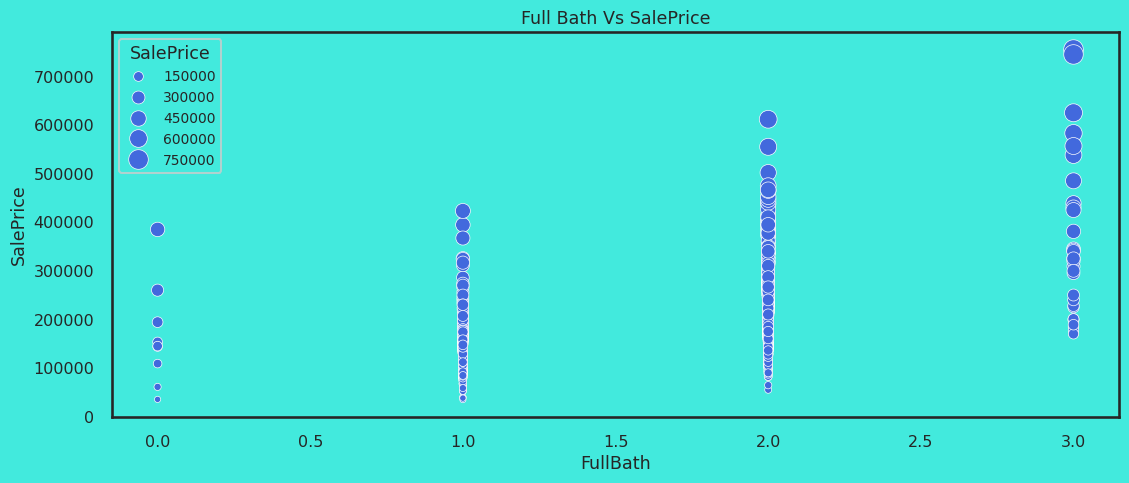

In [34]:
def plot_advanced_scatter(df, x, y, title=None):
    # Set background color and style
    sns.set_style("white", {"axes.facecolor": "#42EADDFF","figure.facecolor":"#42EADDFF"})  # Set background color
    sns.set_context("talk",font_scale = .7)
    plt.figure(figsize=(13, 5))
    sns.scatterplot(data=df, x=x, y=y, size=y, sizes=(20, 200),color='#4269DD')
    plt.xlabel(x)
    plt.ylabel(y)
    if title:
        plt.title(title)
    plt.legend(fontsize=10,title=y)
    plt.show()
plot_advanced_scatter(df_train , x='FullBath', y='SalePrice', title='Full Bath Vs SalePrice')

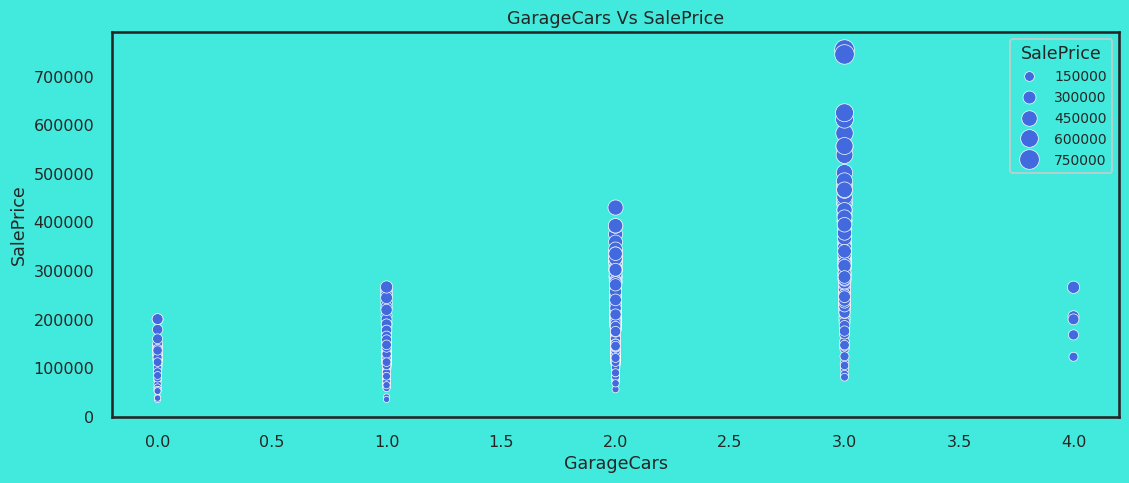

In [35]:
plot_advanced_scatter(df_train , x='GarageCars', y='SalePrice', title='GarageCars Vs SalePrice')

In [36]:
# Group data by 'YearBuilt' and calculate mean 'BedroomAbvGr'
grouped_data = df_train.groupby('YearBuilt')['BedroomAbvGr'].mean().reset_index()

# Create trend plot
fig = px.line(grouped_data, x='YearBuilt', y='BedroomAbvGr',
              labels={'BedroomAbvGr': 'Mean BedroomAbvGr'},
              title='Trend of Mean BedroomAbvGr by Year Built',)
# Update layout with palette color as background
fig.update_layout(paper_bgcolor="#42EADD",
                    plot_bgcolor='#42EADD')
# Show plot
fig.show()

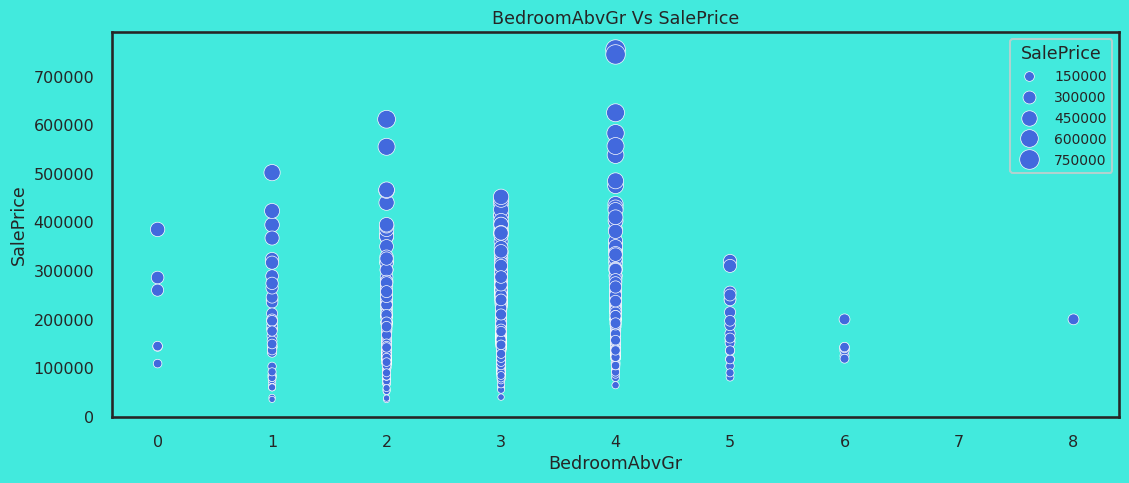

In [37]:
plot_advanced_scatter(df_train , x='BedroomAbvGr', y='SalePrice', title='BedroomAbvGr Vs SalePrice')

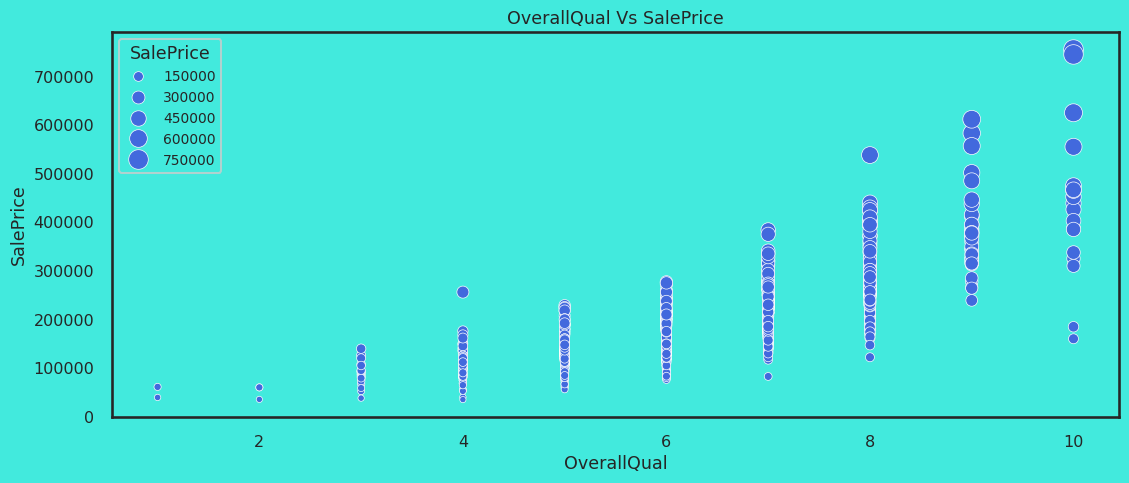

In [38]:
plot_advanced_scatter(df_train , x='OverallQual', y='SalePrice', title='OverallQual Vs SalePrice')

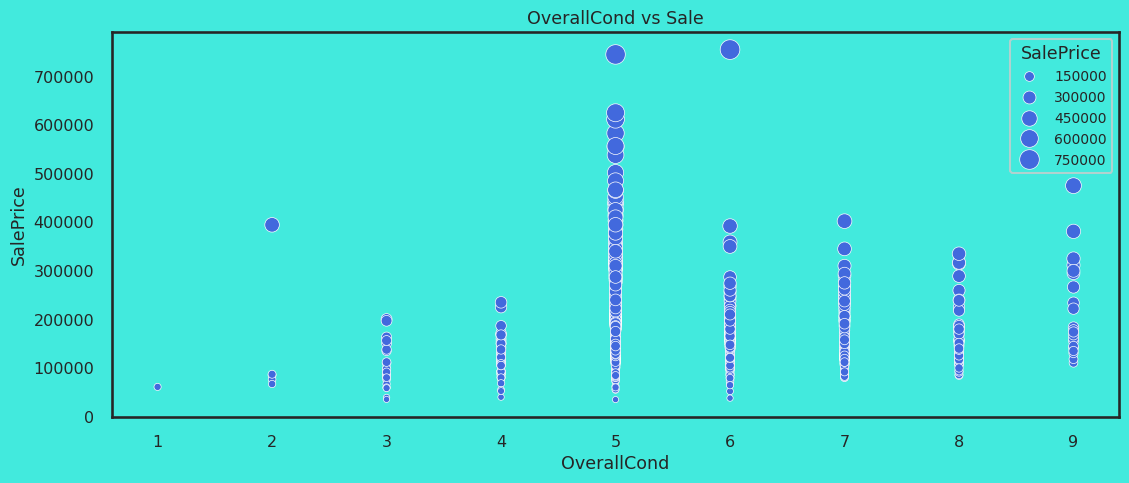

In [39]:
plot_advanced_scatter(df_train , 'OverallCond','SalePrice', title='OverallCond vs Sale')

In [40]:
# Assuming 'YearBuilt' is the column for the year and 'SalePrice' is the column for sale prices
yearly_data = df_train[['YearBuilt', 'SalePrice']]
average_prices_by_year = yearly_data.groupby('YearBuilt')['SalePrice'].mean().reset_index()

# Create the plot
fig = px.line(average_prices_by_year, x='YearBuilt', y='SalePrice', title='Average SalePrice Over the Years')
fig.update_xaxes(title='Year Built')
fig.update_yaxes(title='Average SalePrice')
# Update layout with palette color as background
fig.update_layout(paper_bgcolor="#42EADD",
                    plot_bgcolor='#42EADD')
fig.show()

In [41]:
# Grouping data by 'YearRemodAdd' and counting the occurrences
remodel_counts = df_train['YearRemodAdd'].value_counts().reset_index()
remodel_counts.columns = ['Year', 'Remodel Count']

# Sorting data by year
remodel_counts = remodel_counts.sort_values(by='Year')

# Plotting the trend over time
fig = px.line(remodel_counts, x='Year', y='Remodel Count', title='Trend of Property Remodeling Over Time')
fig.update_xaxes(title='Year of Remodeling')
fig.update_yaxes(title='Number of Remodeling Events')
# Update layout with palette color as background
fig.update_layout(paper_bgcolor="#42EADD",
                    plot_bgcolor='#42EADD')
fig.show()

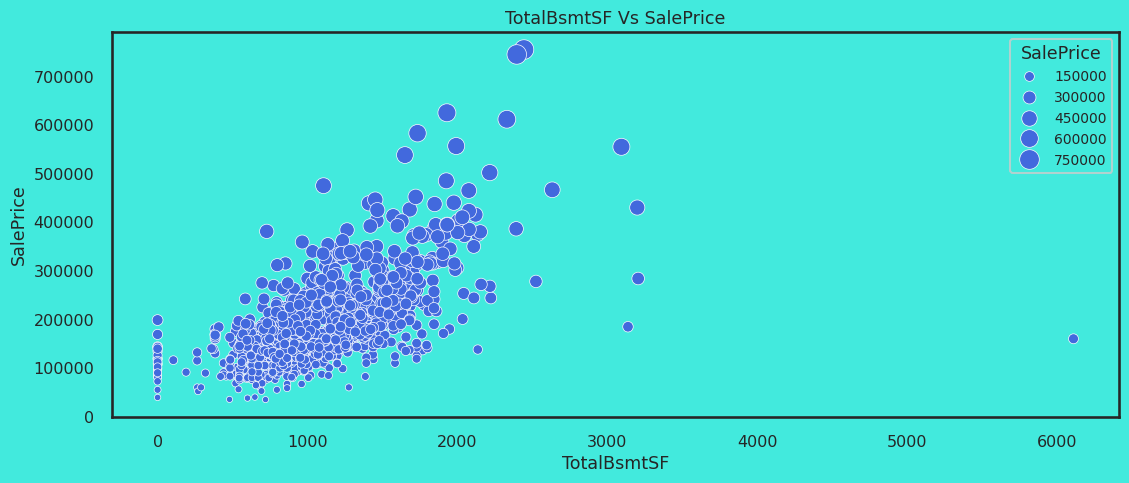

In [42]:
plot_advanced_scatter(df_train , x='TotalBsmtSF', y='SalePrice', title='TotalBsmtSF Vs SalePrice')

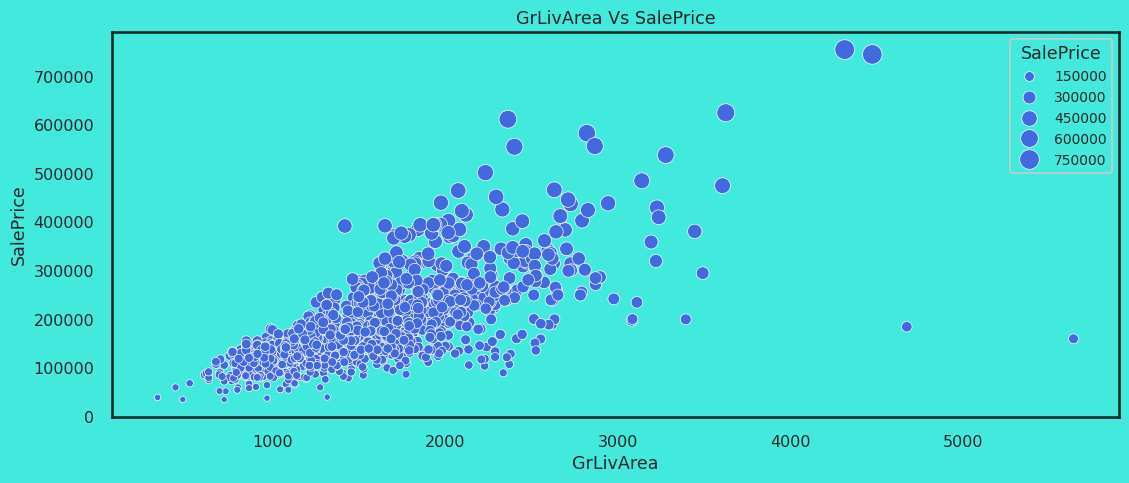

In [43]:
plot_advanced_scatter(df_train , x='GrLivArea', y='SalePrice', title='GrLivArea Vs SalePrice')

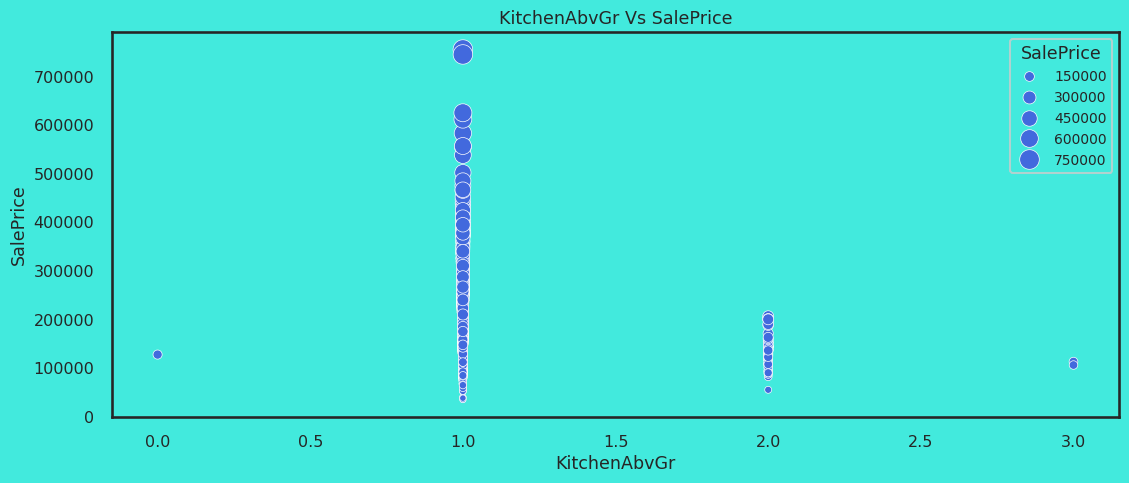

In [44]:
plot_advanced_scatter(df_train , x='KitchenAbvGr', y= 'SalePrice' , title='KitchenAbvGr Vs SalePrice')

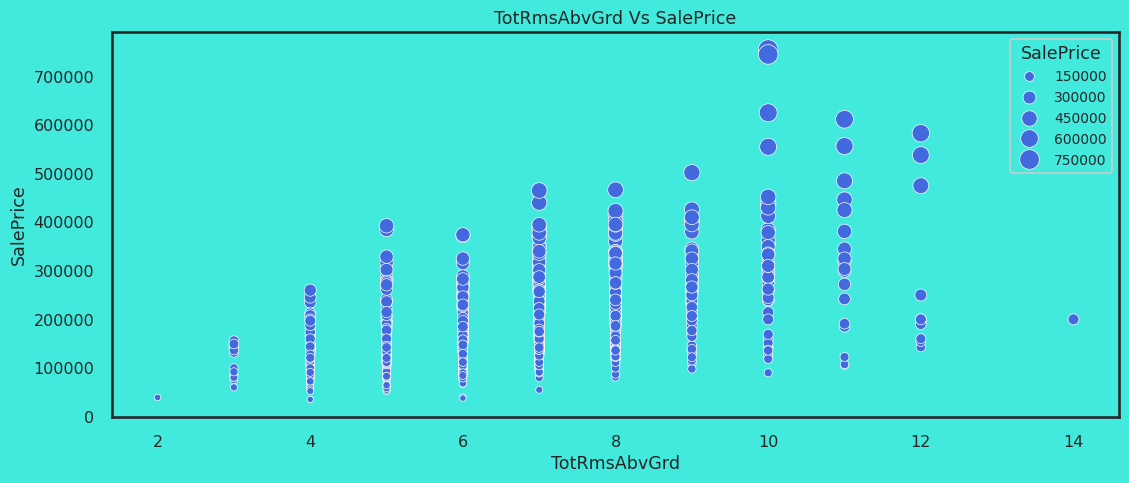

In [45]:
plot_advanced_scatter(df_train , x='TotRmsAbvGrd', y='SalePrice', title='TotRmsAbvGrd Vs SalePrice')

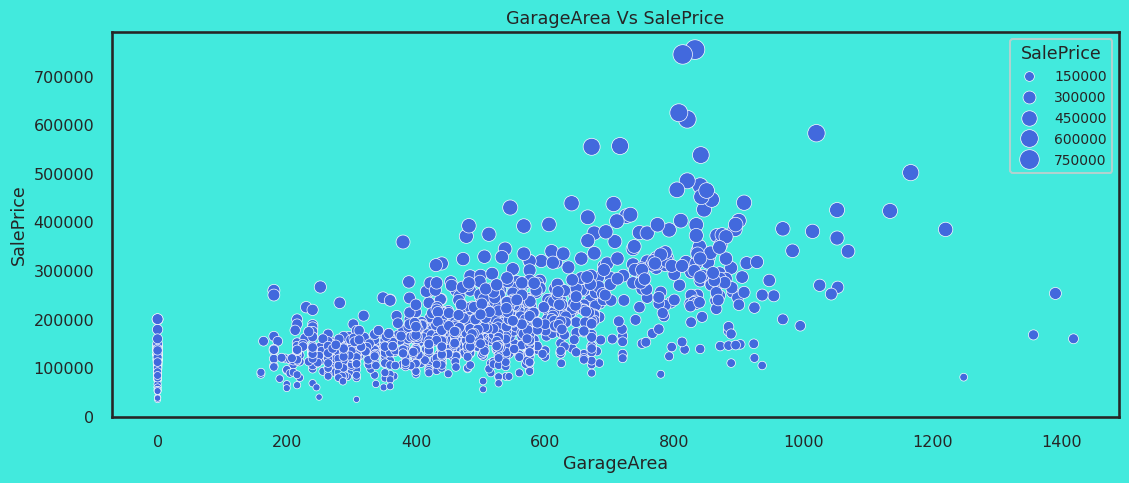

In [46]:
plot_advanced_scatter(df_train , x='GarageArea', y='SalePrice', title='GarageArea Vs SalePrice')

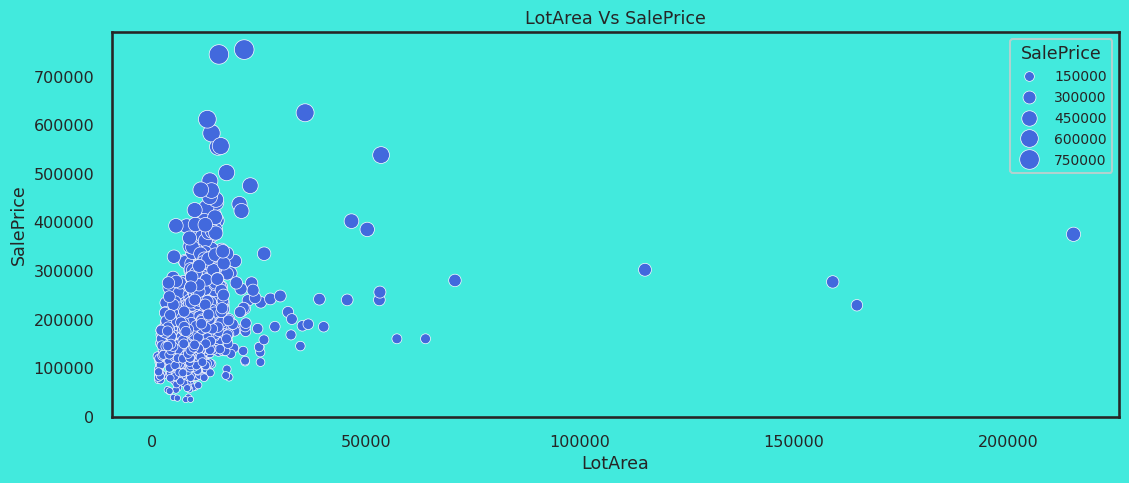

In [47]:
# plot_scatter(df_train, x='LotArea', y='SalePrice', title='LotArea Vs SalePrice')
plot_advanced_scatter(df_train , x='LotArea', y='SalePrice', title='LotArea Vs SalePrice')

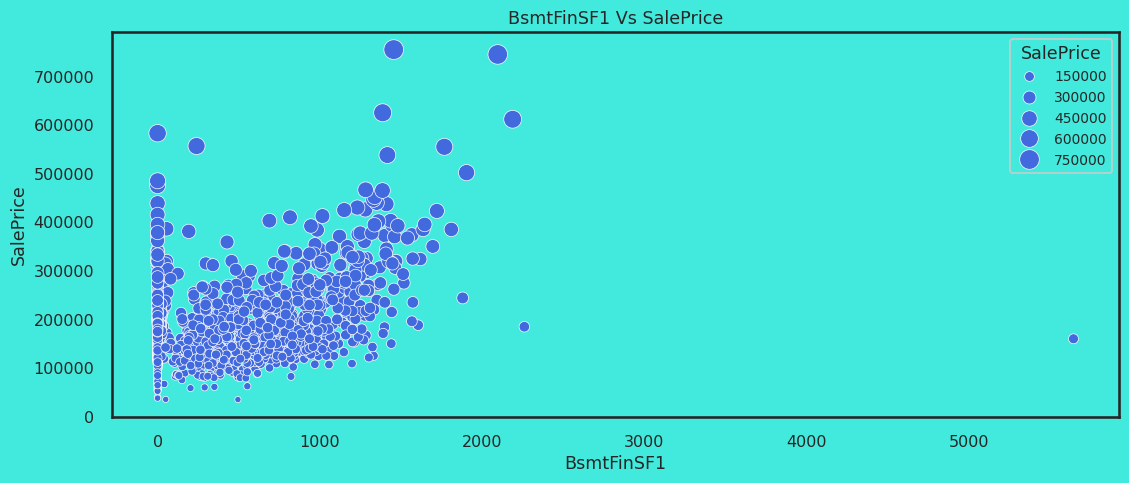

In [48]:
# plot_scatter(df_train, x='BsmtFinSF1', y='SalePrice', title='BsmtFinSF1 Vs SalePrice')
plot_advanced_scatter(df_train , x='BsmtFinSF1', y='SalePrice', title='BsmtFinSF1 Vs SalePrice')

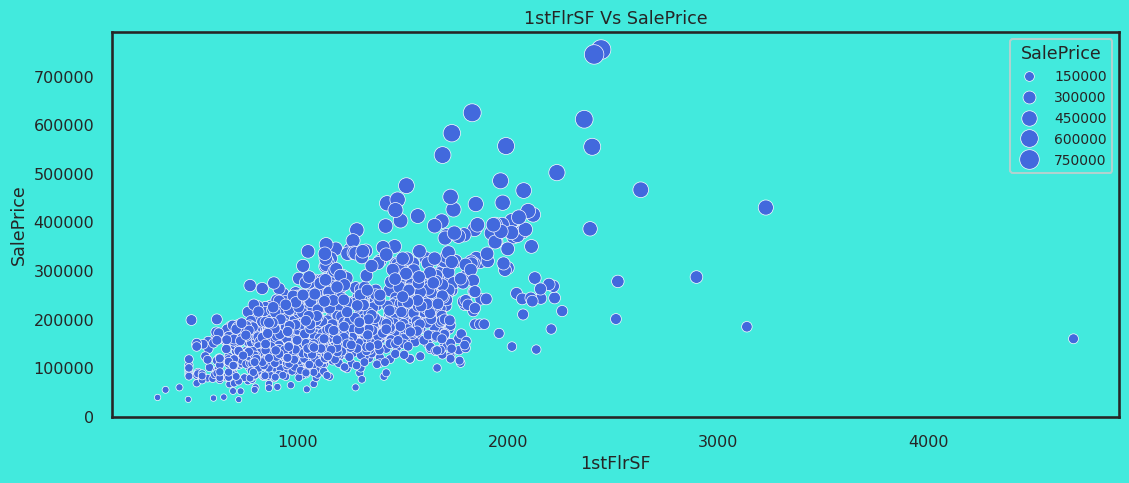

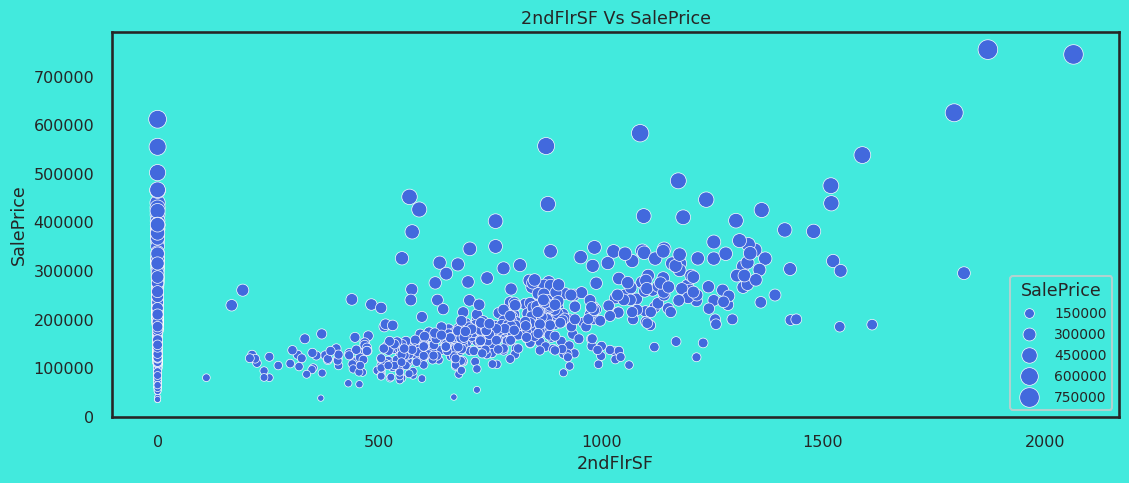

In [49]:
plot_advanced_scatter(df_train , x='1stFlrSF', y='SalePrice', title='1stFlrSF Vs SalePrice')
plot_advanced_scatter(df_train, x='2ndFlrSF', y='SalePrice', title='2ndFlrSF Vs SalePrice')

In [50]:

num_1_out = ['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
 'BsmtUnfSF']

# Calculate the number of rows and columns needed for subplots
num_cols = 2
num_rows = (len(num_1_out) + 1) // num_cols

# Create subplots with the calculated number of rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols)

# Update layout with palette color as background
fig.update_layout(paper_bgcolor="#42EADD",
                    plot_bgcolor='#42EADD')

# Loop through numerical columns and add boxplots with color
for i, col in enumerate(num_1_out, start=1):
    row_num = (i - 1) // num_cols + 1
    col_num = (i - 1) % num_cols + 1
    fig.add_trace(
        go.Box(
            x=df_train[col],
            name=col,
            marker_color='#1f77b4',  # Set box color
            line_color='#1f77b4'     # Set mean line color
        ),
        row=row_num,
        col=col_num
    )

# Update layout
fig.update_layout(
    title_text="Boxplots of Numerical Columns",
    showlegend=False
)
# Show the plot
fig.show()

In [51]:
# List of numerical columns for outliers
num_2_out = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
             'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
             'GarageYrBlt']

# Calculate the number of rows and columns needed for subplots
num_cols = 2
num_rows = (len(num_2_out) + num_cols - 1) // num_cols  # Calculate number of rows based on columns

# Create subplots with the calculated number of rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols)

# Update layout with palette color as background
fig.update_layout(paper_bgcolor="#42EADD", plot_bgcolor='#42EADD')

# Loop through numerical columns and add boxplots with color
for i, col in enumerate(num_2_out, start=1):
    row_num = (i - 1) % num_rows + 1
    col_num = (i - 1) // num_rows + 1
    fig.add_trace(
        go.Box(
            x=df_train[col],
            name=col,
            marker_color='#1f77b4',  # Set box color
            line_color='#1f77b4'     # Set mean line color
        ),
        row=row_num,
        col=col_num
    )

# Update layout
fig.update_layout(title_text="Boxplots of Numerical Columns", showlegend=False)

# Show the plot
fig.show()

In [52]:
num_3_out =  ['GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# Calculate the number of rows and columns needed for subplots
num_cols = 2
num_rows = (len(num_3_out) + num_cols - 1) // num_cols  # Calculate number of rows based on columns

# Create subplots with the calculated number of rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols)

# Update layout with palette color as background
fig.update_layout(paper_bgcolor="#42EADD", plot_bgcolor='#42EADD')

# Loop through numerical columns and add boxplots with color
for i, col in enumerate(num_3_out, start=1):
    row_num = (i - 1) % num_rows + 1
    col_num = (i - 1) // num_rows + 1
    fig.add_trace(
        go.Box(
            x=df_train[col],
            name=col,
            marker_color='#1f77b4',  # Set box color
            line_color='#1f77b4'     # Set mean line color
        ),
        row=row_num,
        col=col_num
    )

# Update layout
fig.update_layout(title_text="Boxplots of Numerical Columns", showlegend=False)

# Show the plot
fig.show()

In [53]:
def preprocess_data(data):
    # Calculate TotalSF feature
    data['TotalSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']
    # Calculate House Age
    data['HouseAge'] = data['YrSold'] - data['YearBuilt']
    # Calculate Total Baths feature
    data['TotalBath'] = data['FullBath'] + 0.5 * data['HalfBath']
    # Calculate OverallQualCond feature
    data['OverallQualCond'] = data['OverallQual'] * data['OverallCond']
    # Calculate RemodelAge feature
    data['RemodelAge'] = data['YrSold'] - data['YearRemodAdd']
    # Calculate GarageSizePerCar feature
    data['GarageSizePerCar'] = np.where(data['GarageCars'] != 0, data['GarageArea'] / data['GarageCars'], 0)
    data['TotalPorchArea'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
    data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']
    data['HasPool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    data['HasFireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    data['TotalBsmtFinSF'] = data['BsmtFinSF1'] + data['BsmtFinSF2']
    data['TotalArea'] = data['LotArea'] + data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
    data['TotalBsmtBath'] = data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath']
    data['TotalRooms'] = data['TotRmsAbvGrd'] + data['BedroomAbvGr'] + data['KitchenAbvGr']
    data['TotalOutdoorArea'] = data[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis=1)
    data['LotFrontageRatio'] = data['LotFrontage'] / data['LotArea']
    return data
df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

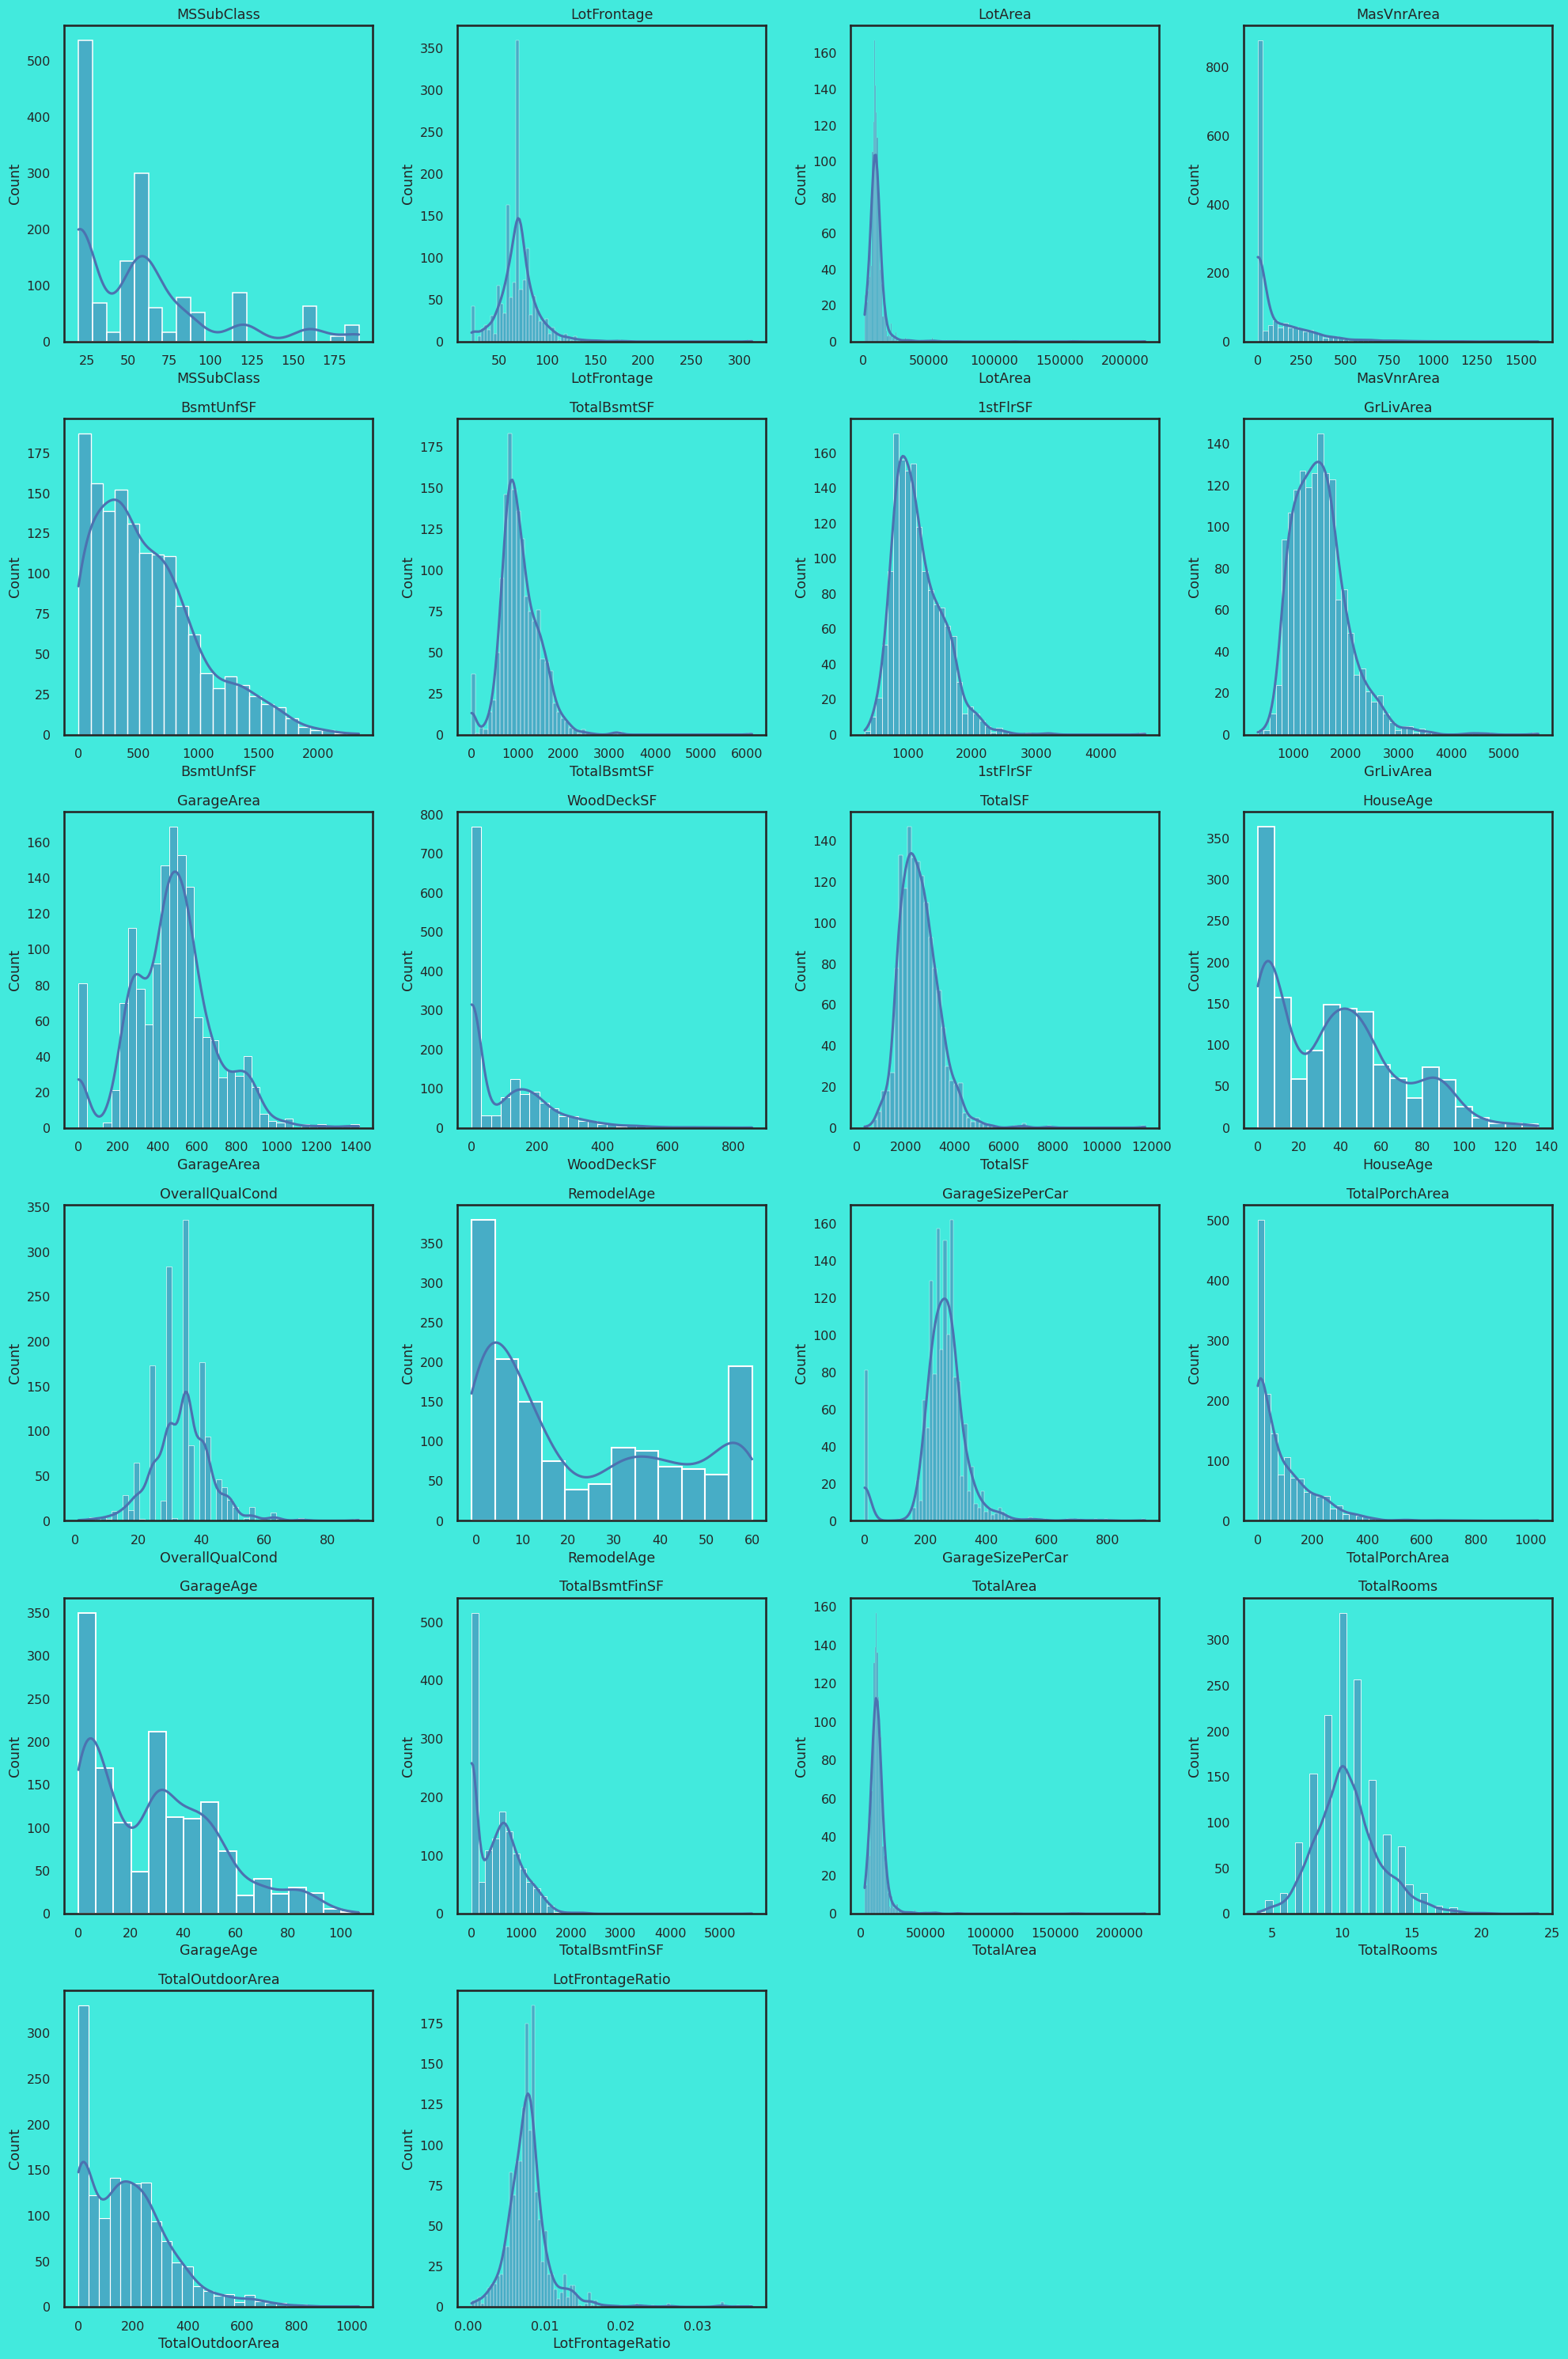

In [54]:
# Selecting numerical features
numeric_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
                     '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'TotalSF',
                       'HouseAge', 'OverallQualCond', 'RemodelAge', 'GarageSizePerCar', 'TotalPorchArea',
                         'GarageAge', 'TotalBsmtFinSF', 'TotalArea',
                           'TotalRooms', 'TotalOutdoorArea', 'LotFrontageRatio']

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
num_rows = math.ceil(num_features / 4)  # Adjust the number 4 based on how many plots you want per row
num_cols = min(num_features, 4)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each numerical feature and create a distribution plot
for i, col in enumerate(numeric_features):
    sns.histplot(df_train[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove any unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [55]:
# Assuming df_train is your DataFrame containing the data
skewness = df_train[numeric_features].skew()

# Display skewness for each numerical feature
print("Skewness of numerical features:")
for feature, skew in skewness.items():
    skew_type = "highly" if abs(skew) > 1 else "moderately" if abs(skew) > 0.5 else "slightly"
    print(f"{feature}: {skew:.6f} (Skewness is {skew_type} skewed)")

Skewness of numerical features:
MSSubClass: 1.407657 (Skewness is highly skewed)
LotFrontage: 2.384950 (Skewness is highly skewed)
LotArea: 12.207688 (Skewness is highly skewed)
MasVnrArea: 2.676412 (Skewness is highly skewed)
BsmtUnfSF: 0.920268 (Skewness is moderately skewed)
TotalBsmtSF: 1.524255 (Skewness is highly skewed)
1stFlrSF: 1.376757 (Skewness is highly skewed)
GrLivArea: 1.366560 (Skewness is highly skewed)
GarageArea: 0.179981 (Skewness is slightly skewed)
WoodDeckSF: 1.541376 (Skewness is highly skewed)
TotalSF: 1.776700 (Skewness is highly skewed)
HouseAge: 0.609030 (Skewness is moderately skewed)
OverallQualCond: 0.437704 (Skewness is slightly skewed)
RemodelAge: 0.502489 (Skewness is moderately skewed)
GarageSizePerCar: -0.082492 (Skewness is slightly skewed)
TotalPorchArea: 2.000029 (Skewness is highly skewed)
GarageAge: 0.659034 (Skewness is moderately skewed)
TotalBsmtFinSF: 1.405961 (Skewness is highly skewed)
TotalArea: 11.554119 (Skewness is highly skewed)
Total

In [56]:
def remove_outliers_zscore(df, columns, threshold=4):
    for col in columns:
        # Calculate the mean and standard deviation
        mean = df[col].mean()
        std_dev = df[col].std()

        # Calculate the Z-score for each value in the column
        z_scores = (df[col] - mean) / std_dev

        # Filter the DataFrame to show outlier values and calculate the sum
        outliers_sum = df.loc[abs(z_scores) > threshold, col].value_counts().sum()
        print(f"Total number of outliers detected and Deleted are : {outliers_sum}")

        # Remove outliers from the dataset
        df_clean = df.loc[abs(z_scores) <= threshold].copy()

    return df_clean

In [57]:
#Plot Box Plot to Seee Outliers in LotArea in Plotly
fig = px.box(df_train, y="LotArea")
fig.update_layout(paper_bgcolor="#42EADD", plot_bgcolor='#42EADD')
fig.show()

In [58]:
df_train = remove_outliers_zscore(df_train, ['LotArea'])

Total number of outliers detected and Deleted are : 10


In [59]:
#Plot Box Plot to Seee Outliers in LotArea in Plotly
fig = px.box(df_train, y="GrLivArea")
fig.update_layout(paper_bgcolor="#42EADD", plot_bgcolor='#42EADD')
fig.show()

In [60]:
df_train = remove_outliers_zscore(df_train,['GrLivArea'])

Total number of outliers detected and Deleted are : 5


In [61]:
#Plot Box Plot to Seee Outliers in LotArea in Plotly
fig = px.box(df_train, y="LotFrontage")
fig.update_layout(paper_bgcolor="#42EADD", plot_bgcolor='#42EADD')
fig.show()

In [62]:
df_train = remove_outliers_zscore(df_train, ['LotFrontage'])

Total number of outliers detected and Deleted are : 6


In [63]:
#Plot Box Plot to Seee Outliers in LotArea in Plotly
fig = px.box(df_train, y="MasVnrArea")
fig.update_layout(paper_bgcolor="#42EADD", plot_bgcolor='#42EADD')
fig.show()

In [64]:
df_train = remove_outliers_zscore(df_train, ['MasVnrArea'])

Total number of outliers detected and Deleted are : 12


In [65]:
Other_num_col_From_all =[ 'MSSubClass', 'BsmtUnfSF', 'TotalBsmtSF',
                     '1stFlrSF', 'GarageArea', 'WoodDeckSF', 'TotalSF',
                       'HouseAge', 'OverallQualCond', 'RemodelAge', 'GarageSizePerCar', 'TotalPorchArea',
                         'GarageAge', 'TotalBsmtFinSF', 'TotalArea',
                           'TotalRooms', 'TotalOutdoorArea', 'LotFrontageRatio']
df_train = remove_outliers_zscore(df_train,columns= Other_num_col_From_all)

Total number of outliers detected and Deleted are : 0
Total number of outliers detected and Deleted are : 0
Total number of outliers detected and Deleted are : 3
Total number of outliers detected and Deleted are : 3
Total number of outliers detected and Deleted are : 2
Total number of outliers detected and Deleted are : 5
Total number of outliers detected and Deleted are : 2
Total number of outliers detected and Deleted are : 0
Total number of outliers detected and Deleted are : 4
Total number of outliers detected and Deleted are : 0
Total number of outliers detected and Deleted are : 5
Total number of outliers detected and Deleted are : 7
Total number of outliers detected and Deleted are : 0
Total number of outliers detected and Deleted are : 1
Total number of outliers detected and Deleted are : 12
Total number of outliers detected and Deleted are : 3
Total number of outliers detected and Deleted are : 5
Total number of outliers detected and Deleted are : 12


In [66]:
#Checking the skewness of dataset
skewness = df_train[numeric_features].skew()

# Display skewness for each numerical feature
print("Skewness of numerical features:")
for feature, skew in skewness.items():
    skew_type = "highly" if abs(skew) > 1 else "moderately" if abs(skew) > 0.5 else "slightly"
    print(f"{feature}: {skew:.6f} (Skewness is {skew_type} skewed)")

Skewness of numerical features:
MSSubClass: 1.439649 (Skewness is highly skewed)
LotFrontage: 0.318734 (Skewness is slightly skewed)
LotArea: 2.566840 (Skewness is highly skewed)
MasVnrArea: 1.887793 (Skewness is highly skewed)
BsmtUnfSF: 0.893781 (Skewness is moderately skewed)
TotalBsmtSF: 0.477149 (Skewness is slightly skewed)
1stFlrSF: 0.886742 (Skewness is moderately skewed)
GrLivArea: 0.749043 (Skewness is moderately skewed)
GarageArea: 0.118028 (Skewness is slightly skewed)
WoodDeckSF: 1.550135 (Skewness is highly skewed)
TotalSF: 0.586423 (Skewness is moderately skewed)
HouseAge: 0.587652 (Skewness is moderately skewed)
OverallQualCond: 0.304389 (Skewness is slightly skewed)
RemodelAge: 0.476974 (Skewness is slightly skewed)
GarageSizePerCar: -0.164109 (Skewness is slightly skewed)
TotalPorchArea: 1.938576 (Skewness is highly skewed)
GarageAge: 0.637478 (Skewness is moderately skewed)
TotalBsmtFinSF: 0.568621 (Skewness is moderately skewed)
TotalArea: 2.227780 (Skewness is high

In [67]:
# #Numerical Feature of Data
numeric_features_qt = [ 'LotFrontage', 'LotArea',  'BsmtUnfSF', 'TotalBsmtSF',
                     '1stFlrSF', 'GrLivArea', 'GarageArea',  'TotalSF',
                       'HouseAge', 'OverallQualCond', 'RemodelAge', 'GarageSizePerCar',
                         'GarageAge',  'TotalArea','TotalRooms',  'LotFrontageRatio']
#Lets Make a Copy of Original Dataset For Data Normalization
df_norm = df_train.copy()
df_norm_test = df_test.copy()

In [68]:
def quantile_transform(data,cols):
    # Transformer
    qt = QuantileTransformer(output_distribution='normal')
    #Use a Loop to Transformer
    for col in cols:
        data[col] = qt.fit_transform(data[[col]])
    return data

#Transform Train Data
df_norm = quantile_transform(df_norm, numeric_features_qt)
#Transform Test Data
df_norm_test = quantile_transform(df_norm_test, numeric_features_qt)

In [69]:
numeric_features_qt_other = ['MSSubClass','MasVnrArea','WoodDeckSF','TotalOutdoorArea','TotalPorchArea','TotalBsmtFinSF']

def quantile_transform(data,cols):
    # Transformer
    qt = QuantileTransformer(output_distribution='uniform', random_state=42)
    #Use a Loop to Transformer
    for col in cols:
        data[col] = qt.fit_transform(data[[col]])
    return data

#Transform Train Data
df_norm = quantile_transform(df_norm, numeric_features_qt_other)
#Transform Test Data
df_norm_test = quantile_transform(df_norm_test, numeric_features_qt_other)

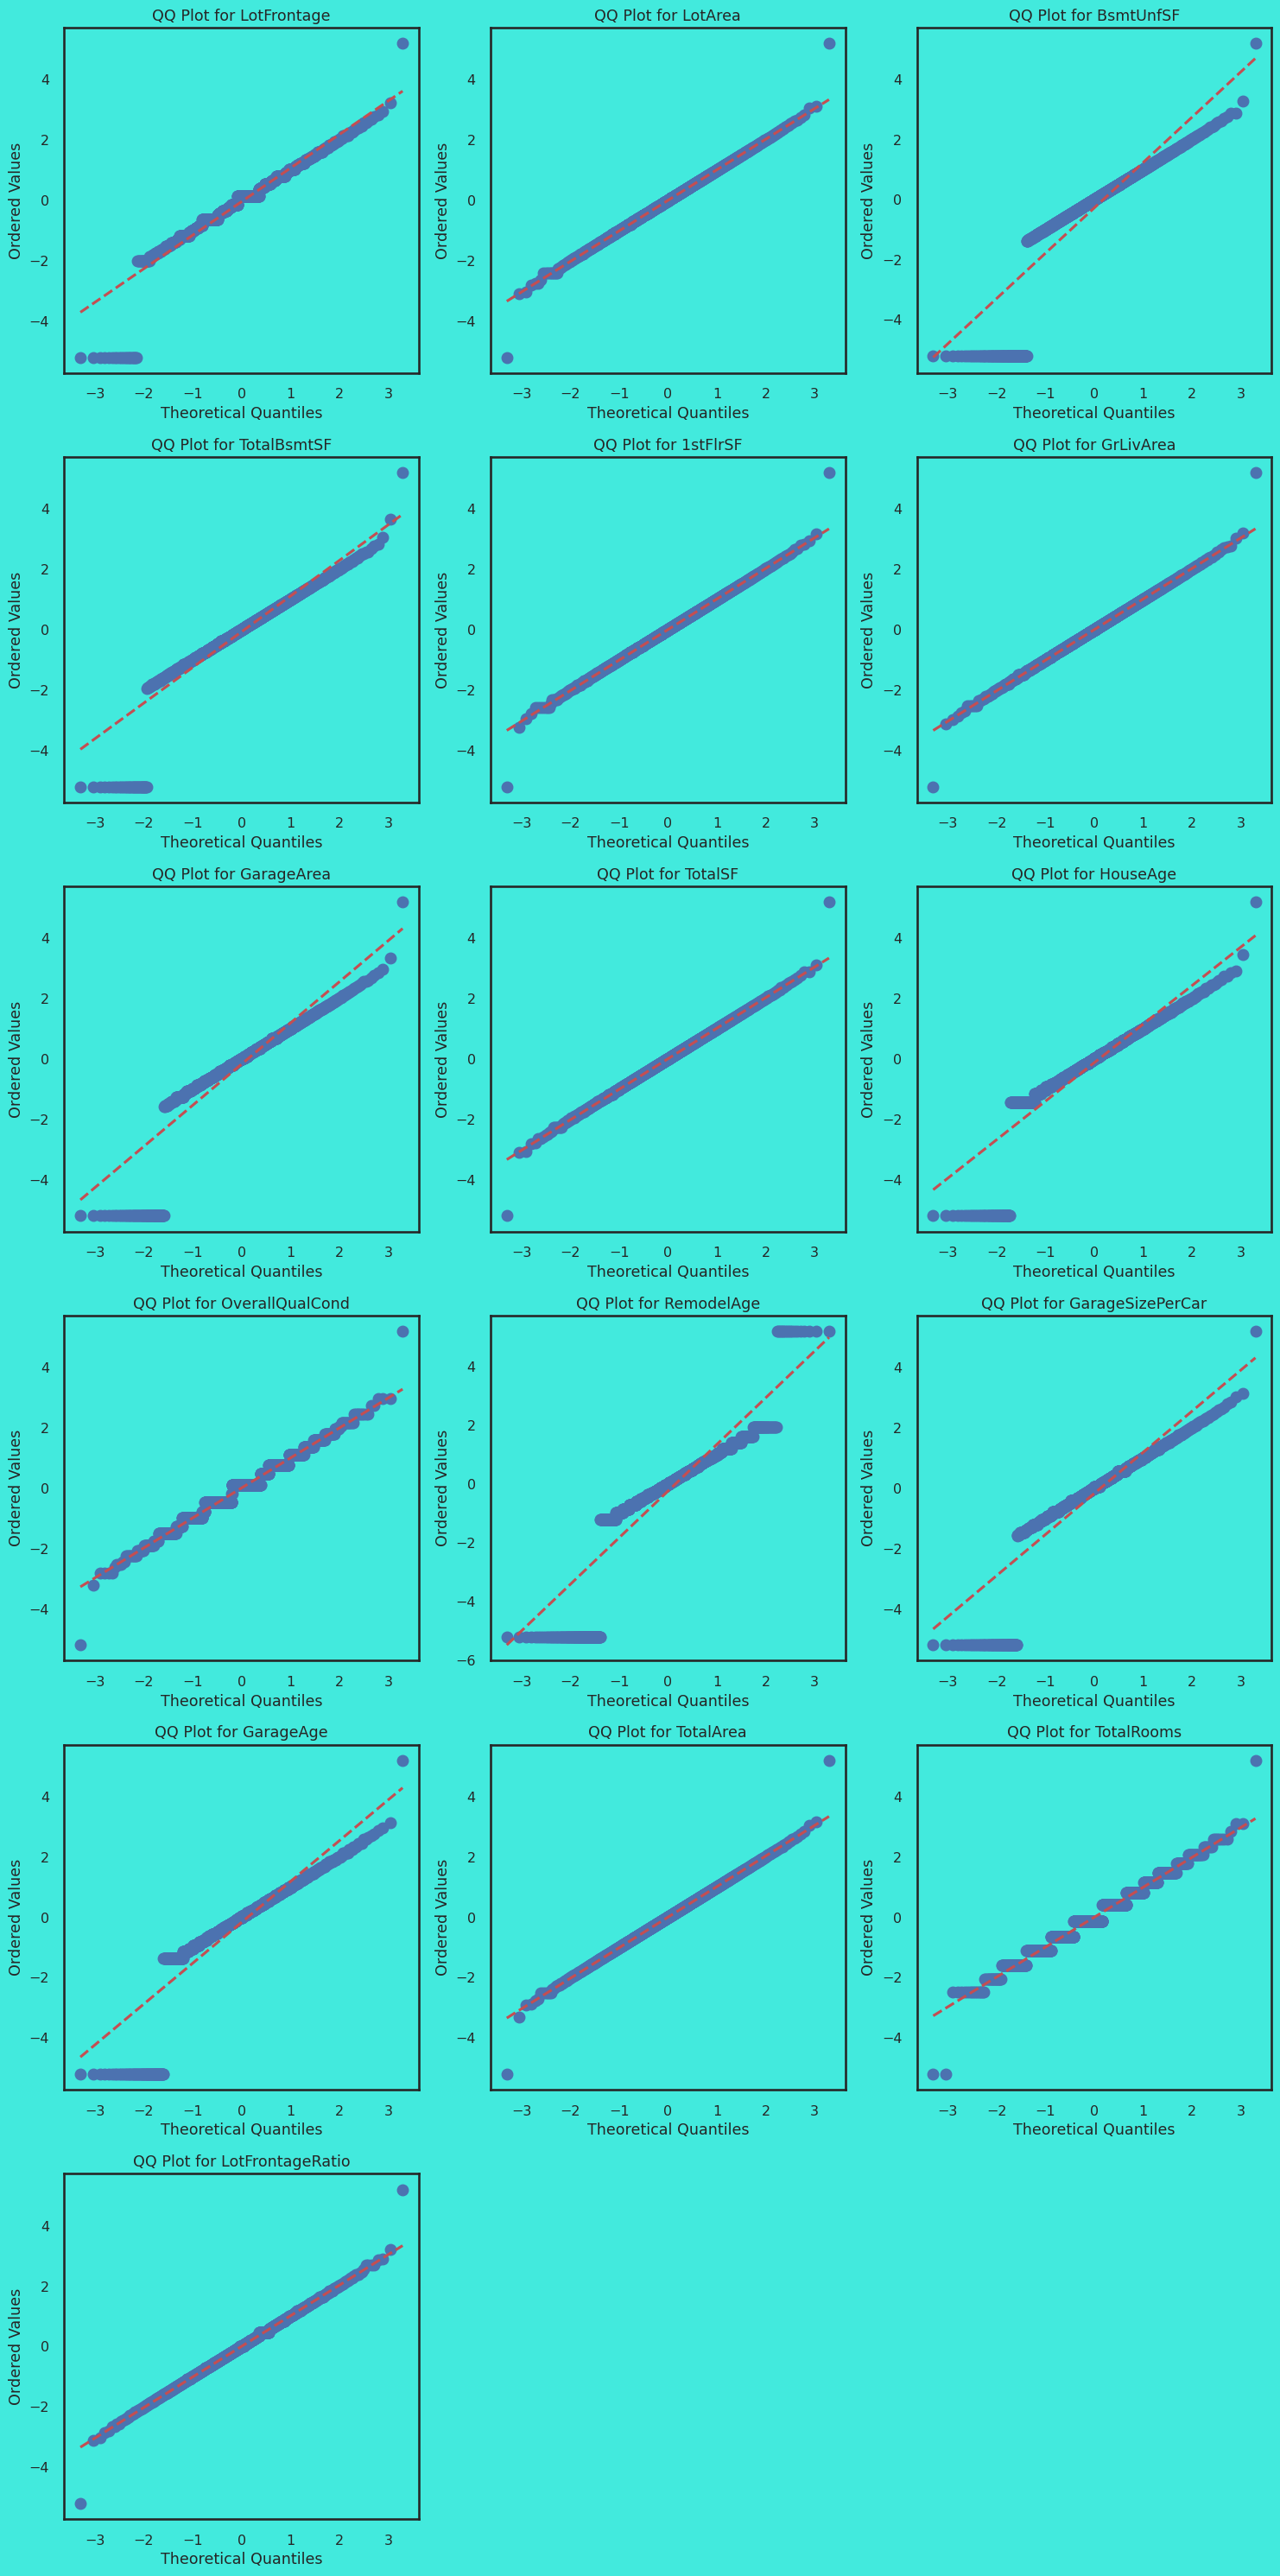

In [70]:
# Function to create QQ plots
def plot_qq(df_qt, feature, ax):
    stats.probplot(df_qt[feature], dist="norm", plot=ax)
    ax.get_lines()[1].set_linestyle('--')
    ax.set_title(f"QQ Plot for {feature}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Ordered Values")

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features_qt)
num_cols = 3  # Number of plots per row
num_rows = math.ceil(num_features / num_cols)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each numerical feature and create a QQ plot
for i, col in enumerate(numeric_features_qt):
    plot_qq(df_norm, col, axes[i])

# Remove any unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

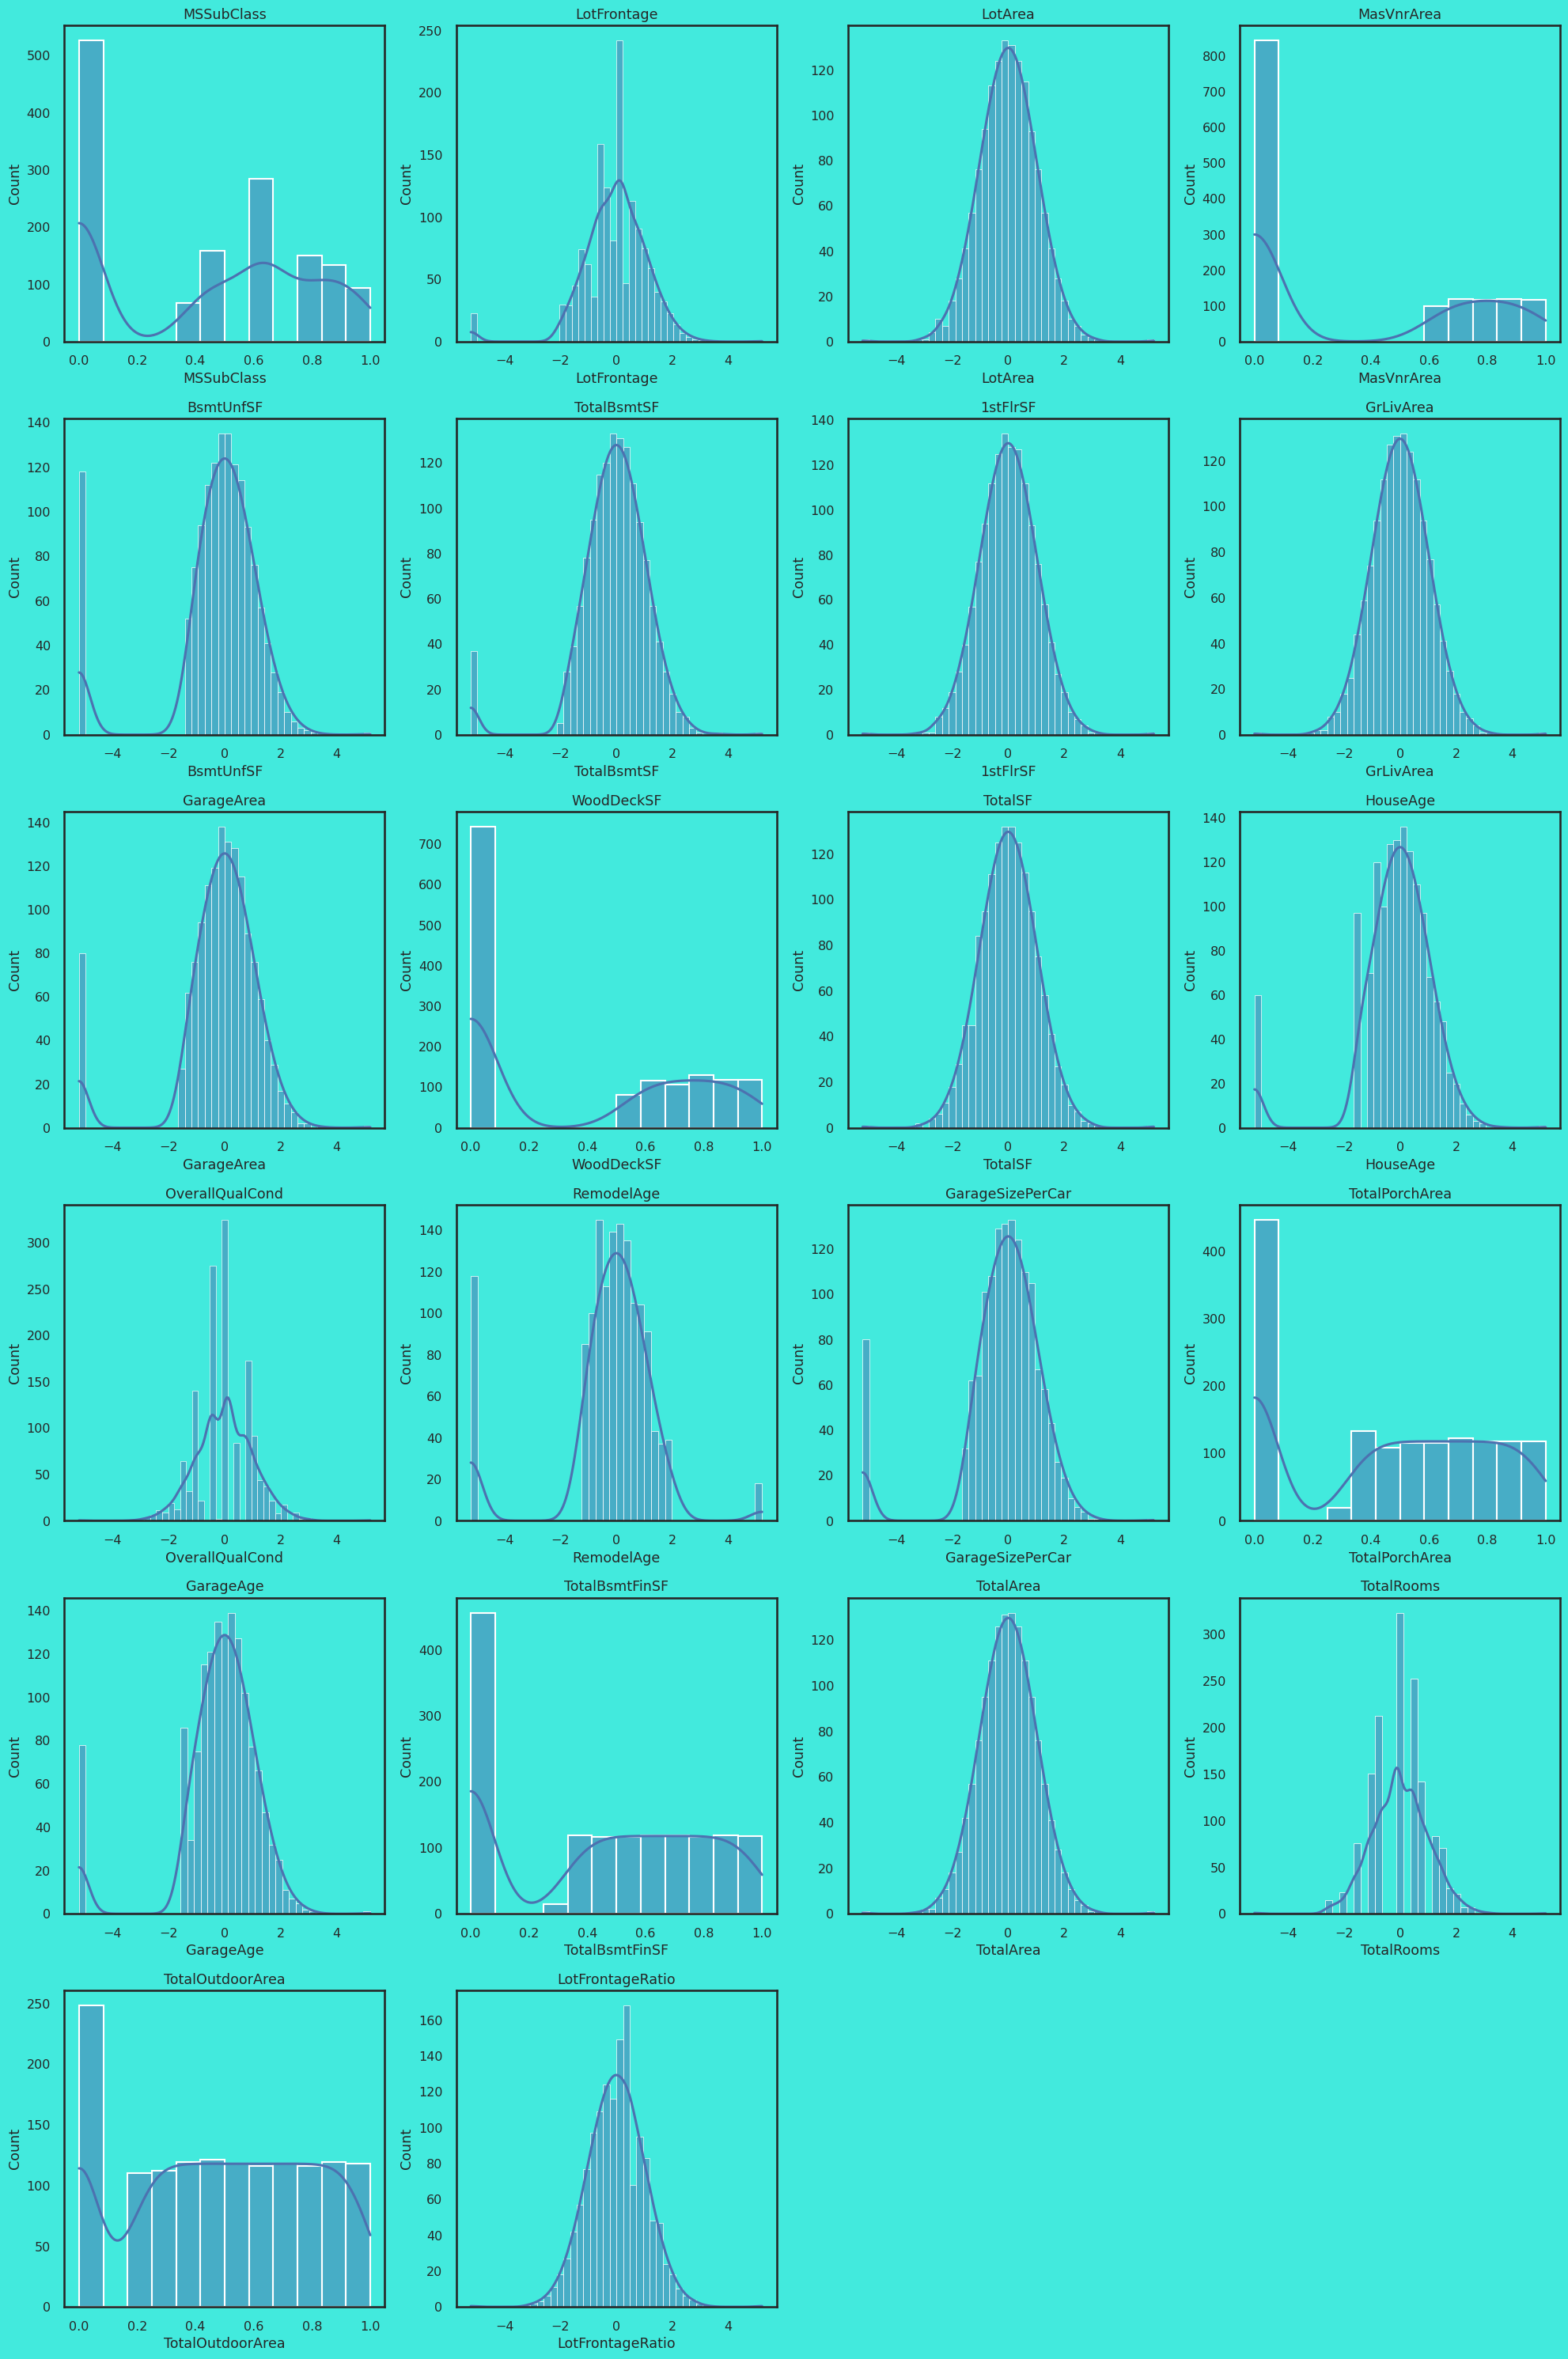

In [71]:
numeric_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
                     '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'TotalSF',
                       'HouseAge', 'OverallQualCond', 'RemodelAge', 'GarageSizePerCar', 'TotalPorchArea',
                         'GarageAge', 'TotalBsmtFinSF', 'TotalArea',
                           'TotalRooms', 'TotalOutdoorArea', 'LotFrontageRatio']

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
num_rows = math.ceil(num_features / 4)  # Adjust the number 4 based on how many plots you want per row
num_cols = min(num_features, 4)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each numerical feature and create a distribution plot
for i, col in enumerate(numeric_features):
    sns.histplot(df_norm[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove any unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [72]:
# Renaming The DataFrames Again BAck to Train and Test
df_train = df_norm.copy()
df_test = df_norm_test.copy()

In [73]:
print(f'The Shape Of Train Data After Adding New Features is : {df_train.shape}')
print(f'The Shape Of Test Data After Adding New Features is : {df_test.shape}')

The Shape Of Train Data After Adding New Features is : (1415, 97)
The Shape Of Test Data After Adding New Features is : (1459, 96)


In [74]:
# Selecting only numerical columns from the DataFrame
numerical_features = df_train.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix
correlation_matrix = numerical_features.corr()

# Filtering features with correlation >= 0.5 with the target variable
high_corr_features = correlation_matrix[correlation_matrix['SalePrice'] >= 0.5]

# Returning high correlated features in table form
high_corr_features_table = pd.DataFrame(high_corr_features['SalePrice'])

# Renaming the column
high_corr_features_table.columns = ['SalePrice']

print(high_corr_features_table)

                 SalePrice
OverallQual       0.802048
YearBuilt         0.556486
YearRemodAdd      0.531773
TotalBsmtSF       0.558502
1stFlrSF          0.593034
GrLivArea         0.686840
FullBath          0.547347
TotRmsAbvGrd      0.518518
GarageCars        0.645609
GarageArea        0.539081
SalePrice         1.000000
TotalSF           0.791385
TotalBath         0.589783
OverallQualCond   0.572116
TotalArea         0.517474


In [75]:
# Here i am Creating a copy of Original Dataset , Which i will Used in Selecting TOp Best Features From Treebased Models .
df = df_train.copy()
# Encoding Categorical Features Using Label Encoder Beacuse The model Will Raise Error if we give Cat Cols .
def encode (df):
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df
df = encode(df)
#X and y
X_rf = df.drop('SalePrice', axis=1)
y_rf = df['SalePrice']

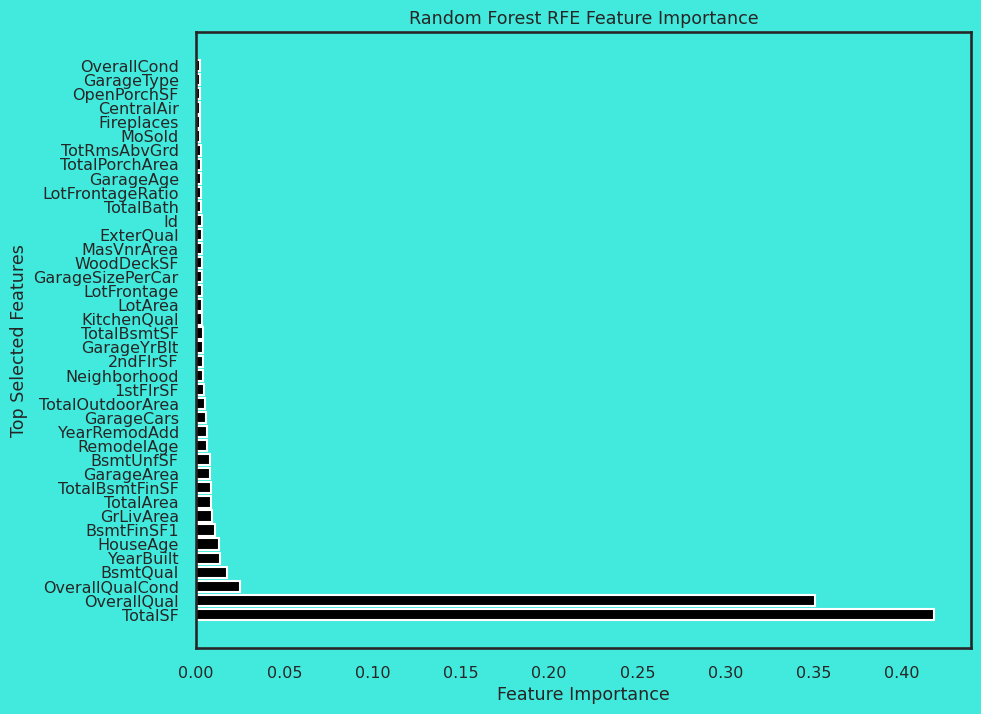

In [78]:
# Initialize RFE with the Random Forest model and number of features to select
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=50)

# Fit RFE to the training data
rfe.fit(X_rf, y_rf)

# Get the selected features
selected_features = X_rf.columns[rfe.support_]

# Train the Random Forest model with the selected features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf[selected_features], y_rf)

# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Get the indices of the top selected features
top_selected_indices = feature_importances.argsort()[-40:][::-1]

# Get the names of the top selected features
top_selected_features = selected_features[top_selected_indices]

# Plotting the top selected features
plt.figure(figsize=(10, 8))
plt.barh(top_selected_features, feature_importances[top_selected_indices], color="black")
plt.xlabel('Feature Importance')
plt.ylabel('Top Selected Features')
plt.title('Random Forest RFE Feature Importance')
plt.show()

In [79]:
# LightGBM Parameters
lgb_params = {'n_estimators': 2500,
             'max_depth': 25,
             'learning_rate': 0.025,
             'min_child_weight': 3.43,
             'min_child_samples': 216,
             'subsample': 0.782,
             'subsample_freq': 4,
             'colsample_bytree': 0.29,
             'num_leaves': 21}

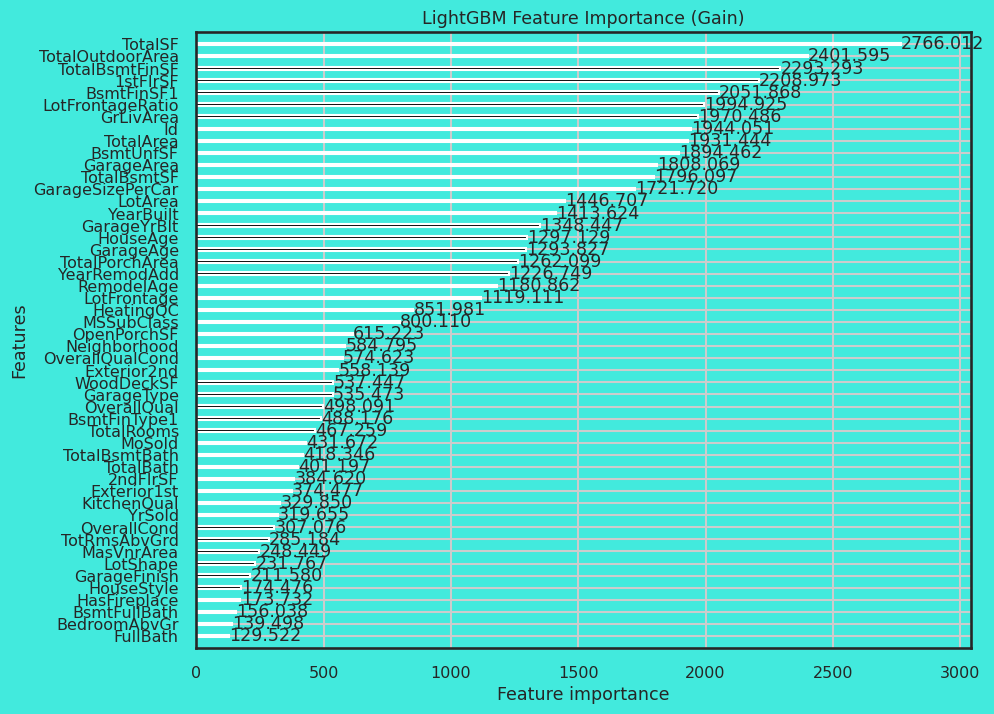

Top 50 Extracted Features:
['TotalSF', 'TotalOutdoorArea', 'Id', 'TotalBsmtFinSF', 'GrLivArea', 'BsmtFinSF1', 'TotalArea', 'BsmtUnfSF', '1stFlrSF', 'LotFrontageRatio', 'TotalBsmtSF', 'LotArea', 'GarageSizePerCar', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'TotalPorchArea', 'RemodelAge', 'HouseAge', 'GarageAge', 'LotFrontage', 'MSSubClass', 'WoodDeckSF', 'Exterior2nd', 'Neighborhood', 'OpenPorchSF', 'HeatingQC', '2ndFlrSF', 'Exterior1st', 'BsmtFinType1', 'OverallQualCond', 'TotalRooms', 'TotalBsmtBath', 'GarageType', 'MoSold', 'OverallQual', 'OverallCond', 'YrSold', 'MasVnrArea', 'TotalBath', 'KitchenQual', 'BsmtFullBath', 'TotRmsAbvGrd', 'HouseStyle']


In [80]:
# Assuming X and y are already defined and contain the feature matrix and target variable

lgb_model = lgb.LGBMClassifier(**lgb_params, verbose=-1)  # Set verbose to produce minimum output
lgb_model.fit(X_rf, y_rf)

lgb.plot_importance(lgb_model, importance_type="gain", figsize=(10, 8), max_num_features=50, color="black",
                    title="LightGBM Feature Importance (Gain)")
plt.show()

# Get feature importance scores
feature_importance_light = pd.DataFrame({'Feature': X_rf.columns, 'Importance': lgb_model.feature_importances_})
feature_importance_light.sort_values(by='Importance', ascending=False, inplace=True)

# Select top 50 features
top_50_features_by_LGBM = feature_importance_light.head(45)['Feature'].tolist()

# Print the list of top 50 features
print("Top 50 Extracted Features:")
print(top_50_features_by_LGBM)


In [81]:
# Encoding Categorical Features Using Label Encoder Beacuse The model Will Raise Error if we give Cat Cols .
def encode (df):
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df
df_train = encode(df_train)
df_test = encode(df_test)

In [83]:
# Sample target variable (array or pandas Series)
target_variable = df_train['SalePrice']

# Log transformation
transformed_target =np.log1p(df_train["SalePrice"])

In [84]:
X_r_f = df_train[top_selected_features]
y_r_f = transformed_target

In [85]:
# Features to use
feature_cols_to_use = X_r_f.columns

# Initialize folds
n = 15

# Initialize StratifiedKFold
folds = KFold(n_splits=n, shuffle=True, random_state=42)  # Use KFold for regression

# Initialize arrays to store predictions and evaluation metrics
test_preds = np.empty((n, len(df_test)))
rmse_vals_cat_rf = []

# Loop through folds
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_r_f, y_rf)):
    X_train_fold, y_train_fold = X_r_f.iloc[train_idx], y_r_f.iloc[train_idx]
    X_test_fold, y_test_fold = X_r_f.iloc[valid_idx], y_r_f.iloc[valid_idx]

    # Create CatBoost datasets
    train_pool = Pool(X_train_fold, y_train_fold)
    val_pool = Pool(X_test_fold, y_test_fold)

    # Initialize CatBoostRegressor
    # cat_model = CatBoostRegressor(
    #     eval_metric='RMSE',  # Set evaluation metric to RMSE
    #     learning_rate=0.001,
    #     iterations=5000,
    #     l2_leaf_reg=3,
    #     verbose=False  # Print training progress every 300 iterations
    # )
    cat_model = CatBoostRegressor(
    eval_metric='RMSE',
    learning_rate=0.01,  # Adjusted learning rate
    iterations=10000,    # Increased number of iterations
    l2_leaf_reg=3,       # Adjusted L2 regularization strength
    verbose=False
)
    # Fit the model
    cat_model.fit(train_pool, eval_set=val_pool)

    # Predict on validation set
    y_pred_val_cat = cat_model.predict(X_test_fold[feature_cols_to_use])

    # Calculate R-squared (optional)
    rmse_rf = np.sqrt(mean_squared_error(y_test_fold, y_pred_val_cat))

    print(f"RMSE for fold {n_fold}: {rmse_rf}")
    rmse_vals_cat_rf.append(rmse_rf)

    # Predict on test set
    y_pred_test_cat_rf = np.expm1(cat_model.predict(df_test[feature_cols_to_use]))
    # y_pred_test_cat = cat_model.predict(df_test[feature_cols_to_use])
    test_preds[n_fold, :] = y_pred_test_cat_rf

    print(f"------- Loop Completed for Fold {n_fold} --------")
print('\n **** Loop finished Successfully **** ')

RMSE for fold 0: 0.10038964272708387
------- Loop Completed for Fold 0 --------
RMSE for fold 1: 0.1401690185114975
------- Loop Completed for Fold 1 --------
RMSE for fold 2: 0.11026897047764656
------- Loop Completed for Fold 2 --------
RMSE for fold 3: 0.0899250480796664
------- Loop Completed for Fold 3 --------
RMSE for fold 4: 0.09969916151680476
------- Loop Completed for Fold 4 --------
RMSE for fold 5: 0.10947893499717601
------- Loop Completed for Fold 5 --------
RMSE for fold 6: 0.14038998583494344
------- Loop Completed for Fold 6 --------
RMSE for fold 7: 0.14134993355322725
------- Loop Completed for Fold 7 --------
RMSE for fold 8: 0.08800800879398733
------- Loop Completed for Fold 8 --------
RMSE for fold 9: 0.1212483732026457
------- Loop Completed for Fold 9 --------
RMSE for fold 10: 0.1174522962366084
------- Loop Completed for Fold 10 --------
RMSE for fold 11: 0.1631760645956834
------- Loop Completed for Fold 11 --------
RMSE for fold 12: 0.1072507694870494
----

In [86]:
r2_rf = r2_score(y_test_fold, y_pred_val_cat)
print(f'R2 Score For Random FOrest Features = {r2_rf}')

R2 Score For Random FOrest Features = 0.9337922459757465


In [87]:
#The mean AUC value across all folds
meanRMSE_r2_cat = np.mean(rmse_vals_cat_rf)
print(f"\n Rmse Score Of Catboost : {meanRMSE_r2_cat}")


 Rmse Score Of Catboost : 0.11448155840550936


In [88]:
X_light = df_train[top_50_features_by_LGBM]
y_light = transformed_target

In [89]:
# Features to use
feature_cols_to_use = X_light.columns

# Initialize folds
n = 10

# Initialize StratifiedKFold
folds = KFold(n_splits=n, shuffle=True, random_state=42)  # Use KFold for regression

# Initialize arrays to store predictions and evaluation metrics
test_preds_light = np.empty((n, len(df_test)))
rmse_vals_cat_light = []

# Loop through folds
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_light, y_light)):
    X_train_fold, y_train_fold = X_light.iloc[train_idx], y_light.iloc[train_idx]
    X_test_fold, y_test_fold = X_light.iloc[valid_idx], y_light.iloc[valid_idx]

    # Create CatBoost datasets
    train_pool = Pool(X_train_fold, y_train_fold)
    val_pool = Pool(X_test_fold, y_test_fold)

    # Initialize CatBoostRegressor
    cat_model = CatBoostRegressor(
        eval_metric='RMSE',  # Set evaluation metric to RMSE
        learning_rate=0.03,
        iterations=10000,
        l2_leaf_reg=3,
        verbose=False  # Print training progress every 300 iterations
    )

    # Fit the model
    cat_model.fit(train_pool, eval_set=val_pool)

    # Predict on validation set
    y_pred_val_cat = cat_model.predict(X_test_fold[feature_cols_to_use])

    # Calculate R-squared (optional)
    rmse_light = np.sqrt(mean_squared_error(y_test_fold, y_pred_val_cat))

    print(f"RMSE for fold {n_fold}: {rmse_light}")
    rmse_vals_cat_light.append(rmse_light)

    # Predict on test set
    y_pred_test_cat = np.expm1(cat_model.predict(df_test[feature_cols_to_use]))
    # y_pred_test_cat = cat_model.predict(df_test[feature_cols_to_use])
    test_preds_light[n_fold, :] = y_pred_test_cat

    print(f"------- Loop Completed for Fold {n_fold} --------")
print('\n **** Loop finished Successfully **** ')

RMSE for fold 0: 0.1062225271655627
------- Loop Completed for Fold 0 --------
RMSE for fold 1: 0.13161748285778824
------- Loop Completed for Fold 1 --------
RMSE for fold 2: 0.10306184998726838
------- Loop Completed for Fold 2 --------
RMSE for fold 3: 0.10213590771065081
------- Loop Completed for Fold 3 --------
RMSE for fold 4: 0.13374754127107638
------- Loop Completed for Fold 4 --------
RMSE for fold 5: 0.12618399263943383
------- Loop Completed for Fold 5 --------
RMSE for fold 6: 0.13895081109626217
------- Loop Completed for Fold 6 --------
RMSE for fold 7: 0.15087482311474712
------- Loop Completed for Fold 7 --------
RMSE for fold 8: 0.10701140224064948
------- Loop Completed for Fold 8 --------
RMSE for fold 9: 0.09845236995760441
------- Loop Completed for Fold 9 --------

 **** Loop finished Successfully **** 


In [90]:
r2_LightGBM_40_features = r2_score(y_test_fold, y_pred_val_cat)
print(f'R2 Score on LightGBM_40_features = {r2_LightGBM_40_features}')


R2 Score on LightGBM_40_features = 0.9272845326799766


In [91]:
#The mean RMSE value across all folds
mean_RMSE_cat_LightGBM_40_features = np.mean(rmse_vals_cat_light)
print(f"\n Rmse Score Of LightGBM_40_features : {mean_RMSE_cat_LightGBM_40_features}")


 Rmse Score Of LightGBM_40_features : 0.11982587080410434


In [92]:
X_elastic = df_train[top_50_features_by_LGBM]
y_elastic = transformed_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_elastic, y_elastic, test_size=0.2, random_state=42)

# Define the hyperparameters grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Define the ElasticNet model
elastic_net = ElasticNet()

# Perform grid search with cross-validation
grid_search_light = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_light.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search_light.best_params_
best_model = grid_search_light.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_light_feature = best_model.predict(X_test)

# Calculate root mean squared error
rmse_ELASTIC_light_Feature = np.sqrt(mean_squared_error(y_test, y_pred_light_feature))
#Printing
print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error:", rmse_ELASTIC_light_Feature)
r2_elastic_light_feature = r2_score(y_test, y_pred_light_feature)
print(f'R2 Score on Elastic Net = {r2_elastic_light_feature}')

Best Hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 1000, 'tol': 1e-05}
Root Mean Squared Error: 0.12444587962475058
R2 Score on Elastic Net = 0.8902627747620878


In [93]:
X_elastic_rf = df_train[top_selected_features]
y_elastic_rf = transformed_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_elastic_rf, y_elastic_rf, test_size=0.2, random_state=42)


# Define the hyperparameters grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Define the ElasticNet model
elastic_net = ElasticNet(random_state=0)

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search_rf.best_params_
best_model = grid_search_rf.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf_feature = best_model.predict(X_test)

# Calculate root mean squared error
rmse_rf_feature = np.sqrt(mean_squared_error(y_test, y_pred_rf_feature))
#Printing
print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error:", rmse_rf_feature)
r2_rf_ELACTIC = r2_score(y_test, y_pred_rf_feature)
print(f'R2 Score on Random Forest = {r2_rf}')

Best Hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 1000, 'tol': 0.0001}
Root Mean Squared Error: 0.12431092343227862
R2 Score on Random Forest = 0.9337922459757465


In [94]:
X_elastic_all = df_train.drop('SalePrice',axis=1)
y_elastic_all = transformed_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_elastic_all, y_elastic_all, test_size=0.2, random_state=42)


# Define the hyperparameters grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Define the ElasticNet model
elastic_net = ElasticNet(random_state=0)

# Perform grid search with cross-validation
grid_search_all= GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_all.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search_all.best_params_
best_model = grid_search_all.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_all = best_model.predict(X_test)

# Calculate root mean squared error
rmse_all = np.sqrt(mean_squared_error(y_test, y_pred_all))
r2_all = r2_score(y_test, y_pred_all)
#Printing
print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error On All Features :", rmse_all)
print(f'R2 Score on All Features = {r2_all}')

Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000, 'tol': 0.001}
Root Mean Squared Error On All Features : 0.1216247447025485
R2 Score on All Features = 0.8951817717792697


In [95]:
# Print the results of each model
print(f"1. First Of all I Do Feature Selection Using Random Forest and LightGBM and Select The Top Best Features "
      f"For The Model.")
print('************************************************************************************')
print(f"2. Then I Train My Cat Boost Model On Both Best Features and Try To Notice Both Results and Hope to Gain "
      f"Best Results Without Any Overfitting Case.")
print('************************************************************************************')
print(f". I Have Tried Many Algorithms Here I am Only Showing You The Best One According to My Resources and Work ")
print('************************************************************************************')
print(f"3. Here The Results Of My Cat Boost Model on Random Forest Features:\n R2_Score Of {r2_rf} and RMSE Score Of "
      f"{meanRMSE_r2_cat}")
print('************************************************************************************')
print(f"4. Here The Results Of My Cat Boost Model on LightGBM Features:\n R2_Score Of {r2_LightGBM_40_features} and "
      f"RMSE Score Of {mean_RMSE_cat_LightGBM_40_features}")
print('************************************************************************************')
print(f"5. Further I am Not Well Trying to Do some More and Then I Apply Elastic Net and Use Best Param and Hyper Tuning Using "
      f"GridSearch For Best Result. But Cat Boost Is Performing well Here Also.")
print('************************************************************************************')
print(f"Here Results Of Elastic Net on LightGBM Select Top Features:\n R2_Score = {r2_elastic_light_feature} and RMSE = {rmse_ELASTIC_light_Feature} But Here Also "
      f"Elastic Net Is Not Performing well as Compared to CatBoost.")
print('************************************************************************************')
print(f"Here Results Of Elastic Net on Random Forest Select Top Features : \n R2_Score = {r2_rf} and RMSE = {rmse_rf} But Here Also "
      f"Elastic Net Is Not Performing well as Compared to CatBoost.")
print('************************************************************************************')

# Compare models based on R2 score
models_r2 = {
    'CatBoost (Random Forest Features)': r2_rf,
    'CatBoost (LightGBM Features)': r2_LightGBM_40_features,
    'Elastic Net (LightGBM Features)': r2_elastic_light_feature,
    'Elastic Net (Random Forest Features)': r2_rf_ELACTIC  # Update with Elastic Net on RF features
}

best_model_r2 = max(models_r2, key=models_r2.get)
print("\n")
print('********** Best Model With Top Features Based On R2_Score According to My Resources  **********')
print(f"Best Model based on R2 Score: {best_model_r2} (R2 Score: {models_r2[best_model_r2]})")
# Compare models based on RMSE
models_rmse = {
    'CatBoost (Random Forest Features)': meanRMSE_r2_cat,
    'CatBoost (LightGBM Features)': mean_RMSE_cat_LightGBM_40_features,
    'Elastic Net (LightGBM Features)': rmse_ELASTIC_light_Feature,  # Update with Elastic Net on LightGBM features
    'Elastic Net (Random Forest Features)': rmse_rf_feature
}

best_model_rmse = min(models_rmse, key=models_rmse.get)
print("\n")
print('********** Best Model With Top Features Based On RMSE According to My Resources  *****************')
print(f"Best Model based on RMSE: {best_model_rmse} (RMSE: {models_rmse[best_model_rmse]})")
print("\n")


1. First Of all I Do Feature Selection Using Random Forest and LightGBM and Select The Top Best Features For The Model.
************************************************************************************
2. Then I Train My Cat Boost Model On Both Best Features and Try To Notice Both Results and Hope to Gain Best Results Without Any Overfitting Case.
************************************************************************************
. I Have Tried Many Algorithms Here I am Only Showing You The Best One According to My Resources and Work 
************************************************************************************
3. Here The Results Of My Cat Boost Model on Random Forest Features:
 R2_Score Of 0.9337922459757465 and RMSE Score Of 0.11448155840550936
************************************************************************************
4. Here The Results Of My Cat Boost Model on LightGBM Features:
 R2_Score Of 0.9272845326799766 and RMSE Score Of 0.11982587080410434
************

In [96]:
# Data for R2 score
r2_scores = [models_r2[model] for model in models_r2.keys()]
r2_models = list(models_r2.keys())

# Data for RMSE
rmse_scores = [models_rmse[model] for model in models_rmse.keys()]
rmse_models = list(models_rmse.keys())

# Create figure
fig = go.Figure()

# Add traces for R2 score and RMSE
fig.add_trace(go.Bar(x=r2_models, y=r2_scores, name='R2 Score', ))
fig.add_trace(go.Bar(x=rmse_models, y=rmse_scores, name='RMSE',))

# Update layout
fig.update_layout(
    title='Comparison of Models Based on R2 Score and RMSE',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Score'),
    barmode='group',
    paper_bgcolor="#42EADD",
    plot_bgcolor='#42EADD')

# Show plot
fig.show()